# ADVANCED STATISTICS FOR PHYSICS ANALYSIS - Third Lab

### Student: Alessandro Marcomini (2024286)


### Date: May 2, 2021

In [1]:
library(tidyverse)
library(lubridate)
library(dplyr)
library(ggplot2)
options(repr.plot.width=15, repr.plot.height=10)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




## Exercise 1 
- The triangular distribution, in the interval (a, b), is given by the following:

$$
f(X) = \left\{ \begin{array}{3}
\frac{2(x-a)}{(b-a)(c-a)} & a \le x < c \\
\frac{2(b-x)}{(b-a)(b-c)} & c \le x \le b \\
0 & \mbox{otherwise}
\end{array}
\right.
$$
where c ∈ [a, b].

#### A. Plot the function, given the interval (a, b)

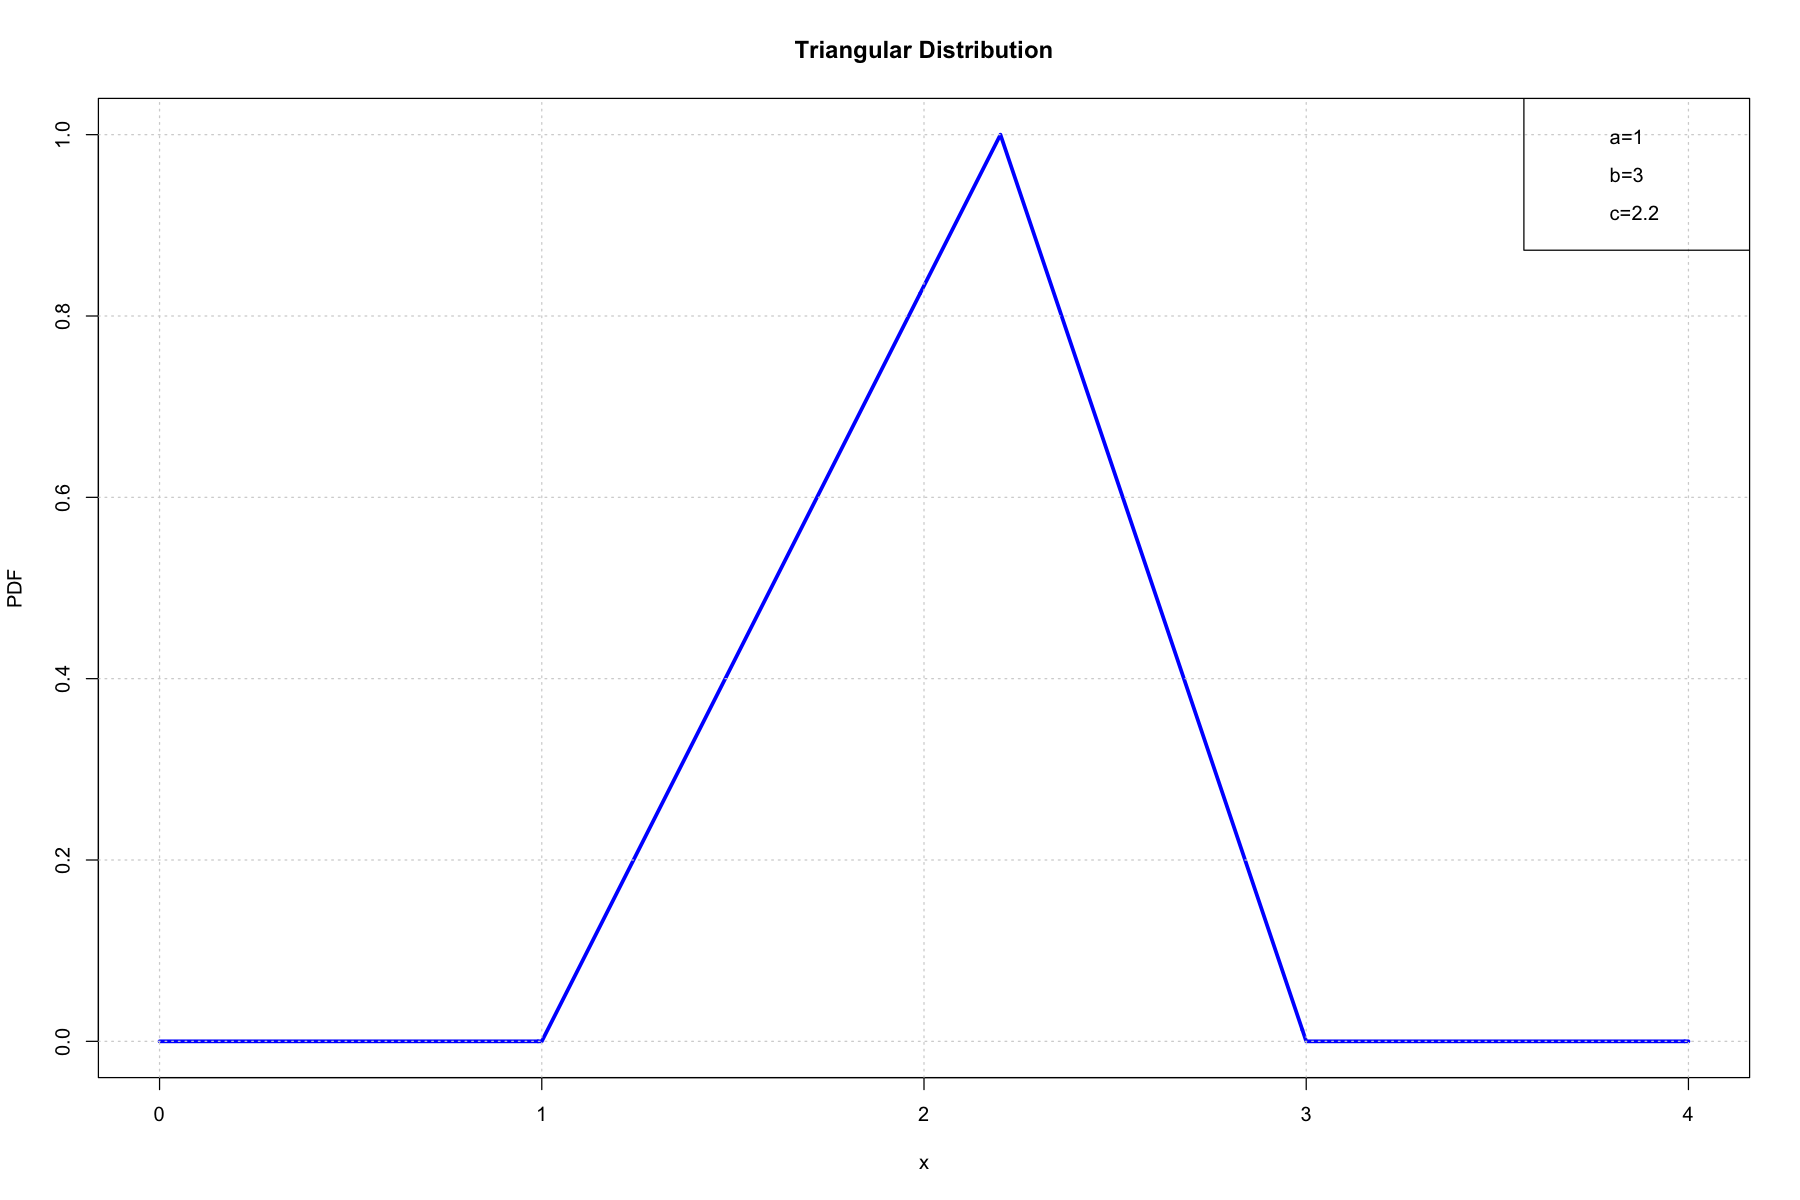

In [2]:
#set function params
a = 1
b = 3
c = 2.2


#define internal functions and pdf 
f1 <- function(x,a,b,c){
    2*(x-a)/((b-a)*(c-a))
    }
f2 <- function(x,a,b,c){
    2*(b-x)/((b-a)*(b-c))
    }
f  <- function(x,a,b,c){
    if (c<a || b<c){
        print('ERROR: c not in [a,b] interval')
    }
    else{
        ifelse((x >= a && x <= b), ifelse(x<c, f1(x,a,b,c), f2(x,a,b,c)), 0)
    }
}


x <- seq(0,4,0.01)
PDF_data = Vectorize(f)(x,a,b,c)

plot(x,PDF_data, pch=20, cex=.1, col='blue', xlab = 'x',ylab='PDF', main='Triangular Distribution')
lines(x,PDF_data, col='blue', lty = 1, lw=3)
grid()
legend('topright', c('a=1','b=3', 'c=2.2'))

#### B. Write an algorithm to generate random numbers from the triangular distribution

Inside the $[a,b]$ range, where the function is non-null, the distribution is in the form:
$$
F(X) = \sum_{i=1}^2 \omega_i f_i(x)
$$
Where:
$$
\omega_1 = \frac{c-a}{b-a} \text{ and } 
f_1(x) = \frac{2(x-a)}{(c-a)^2} \implies F_1(x) = \frac{(x-a)}{2}f_1(x) = \frac{(x-a)^2}{(c-a)^2}
$$

$$
\omega_2 = \frac{b-c}{b-a} \text{ and } 
f_2(x) = \frac{2(b-x)}{(b-c)^2} \implies F_2(x) = 1 - \frac{(b-x)}{2}f_2(x) = 1 - \frac{(b-x)^2}{(b-c)^2}
$$

The cumulative density function has been simply calculated as the area of the triangle.

One may notice that $\omega_1 +\omega_2 = \frac{b-a}{b-a} = 1$. 
Thus, we can apply the composition sampling method. Firstly, it is necessary to calculate the inverse functions:

$$
g_1(y) := F^{-1}_1 \ \ (y) = a + (c-a)\cdot\sqrt{y}
$$

$$
g_2(y) := F^{-1}_2 \ \ (y) = b - (b-c)\cdot\sqrt{(1-y)}
$$

And then implment the random sample generator. Please notice that for simulation purposes the y variable in equations above will be uniformly drawn from $\mathcal{U}(0,1)$ and thus the distribution (and consequently the probability) associated to $y$ will be the same of $(1-y)$. Hence, it will be used simply $y \sim \mathcal{U}(0,1)$ for both cases.

In [3]:
#write inverse functions (here y is named u because drawn from U(0,1))
g1 <- function(u,a,b,c){
    x = a + sqrt(u)*(c-a)
}

g2 <- function(u,a,b,c){
    x = b - sqrt(u)*(b-c)
}

#Write total function
g  <- function(u1,u2,a,b,c,omega1){
    if (c<a || b<c){
        print('ERROR: c not in [a,b] interval')
    }
    else{
        ifelse(u1<omega1, g1(u2,a,b,c), g2(u2,a,b,c))
    }
}


#Random sample generator
RSG <- function(n,a,b,c){
    U1 <- runif(n)
    U2 <- runif(n)
    omega1 = (c-a)/(b-a)
    histo_data <- Vectorize(g)(U1,U2,a,b,c,omega1)
}

#### C. Generate $10^4$ random numbers from the distribution, show them in an histogram and superimpose the analytical curve

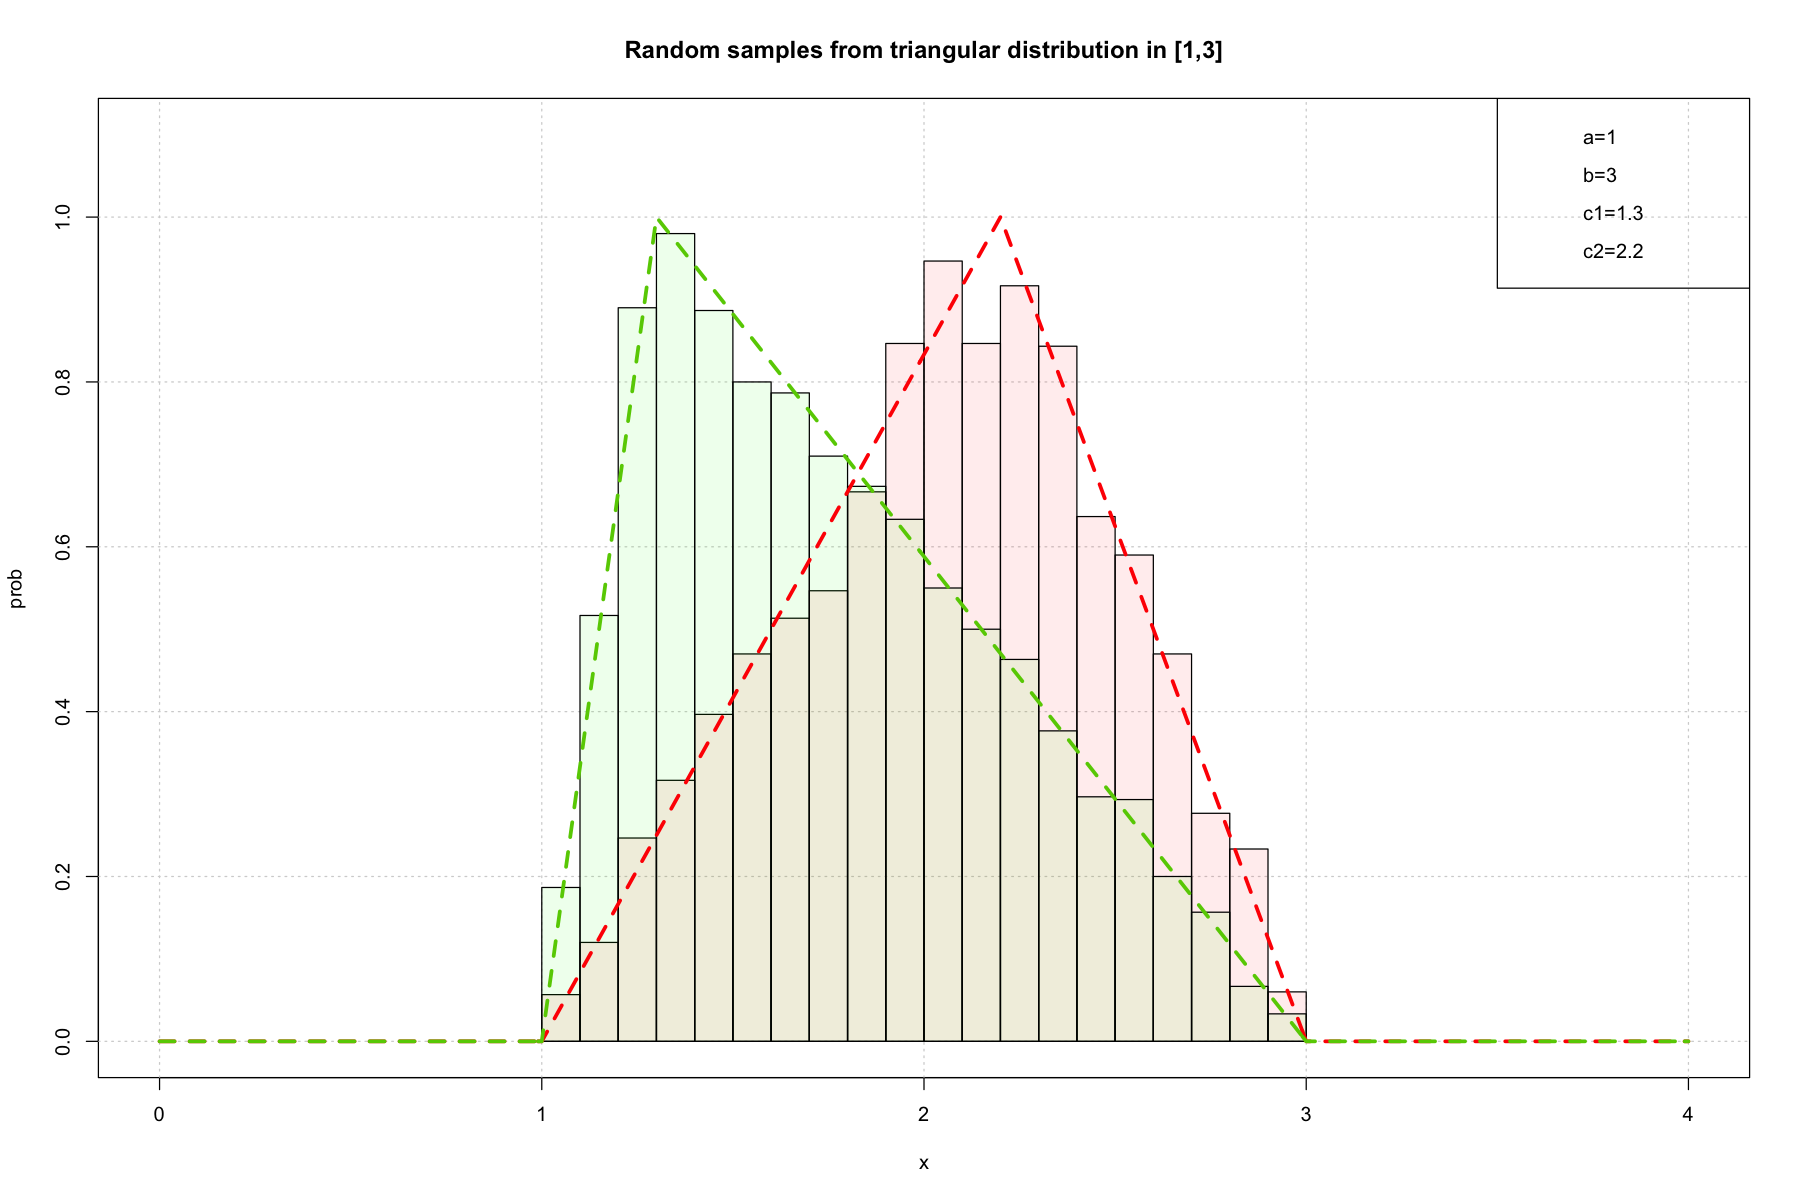

In [4]:
set.seed(2024286)

#set function params
n.samples = 3000
a = 1
b = 3
c1 = 2.2
c2 = 1.3

#Create histograms
histo_data_1 <- RSG(n.samples,a,b,c1)
histo_data_2 <- RSG(n.samples,a,b,c2)

#Plot

x <- seq(0,4,0.01)

col1 <- rgb(255, 0, 0, max = 255, alpha = 20, names = "red50")
col2 <- rgb(0, 255, 0, max = 255, alpha = 20, names = "green50")

PDF_data_1 = Vectorize(f)(x,a,b,c1)
PDF_data_2 = Vectorize(f)(x,a,b,c2)
plot(x,PDF_data_1, pch=20, cex=0, col='red', xlab = 'x',ylab='prob', main = 'Random samples from triangular distribution in [1,3]', ylim=c(0,1.1))
grid()
breaks = seq(1,3,0.1)
hist(histo_data_1, breaks=breaks, prob = TRUE, add=TRUE, col = col1)
hist(histo_data_2, breaks=breaks, prob = TRUE, add=TRUE, col = col2)

lines(x,PDF_data_1, col='red', lty = 2, lw=3)
lines(x,PDF_data_2, col='chartreuse3', lty = 2, lw=3)
legend('topright', c('a=1','b=3', 'c1=1.3', 'c2=2.2'))

As shown in the plot above, the function is correctly implemented and the $n=3000$ random samples are displayed in accordance with the expected PDFs. I wanted to plot together two different asymmetric triangular distributions to give a better idea of the functioning of the process. 

## Exercise 2 - Markov’s inequality

- Markov’s inequality represents an upper bound to probability distributions:
$$
P(X \ge k) \le \frac{E[x]}{k} \ \ \text{ for } k>0
$$
- Where $F$ is the cumulative density function and having defined a function:
$$
G(k)=1−F(k)\equiv P(X \ge k)
$$ 

#### A. Plot G(k) and the Markov’s upper bound for the exponential, $Exp(\lambda = 1)$, distribution function

In the following I define a funciton for plotting and aim to show the boundary provided by Markov inequality for different cases. It is worth noticing that while for continuous PDFs it is true that $P(X \ge k) = P(X > k)$ since the probability $P(X=k)= 0$ given the fact that a point constitutes a set of measure null, this is not the case for discrete probabilities. However, while sampling for k with little step and high density, the term $P(X=k)$ seems to be neglectible and the following graphs depict the case.

In [5]:
#Function for plotting:
plot_graph <- function(k,G.k,Markov,title){
    df <- tibble(k,G.k,Markov)
    df <- reshape2::melt(df, id.vars='k')
    plt <- ggplot(df, aes(k, value, color=variable)) + labs(x="k", y="G(k) = 1 - CDF(k)") 
    plt <- plt + geom_point(size=3) + ggtitle(title) + geom_line(size=1.5) + theme(plot.title = element_text(size=22))
    plt
}

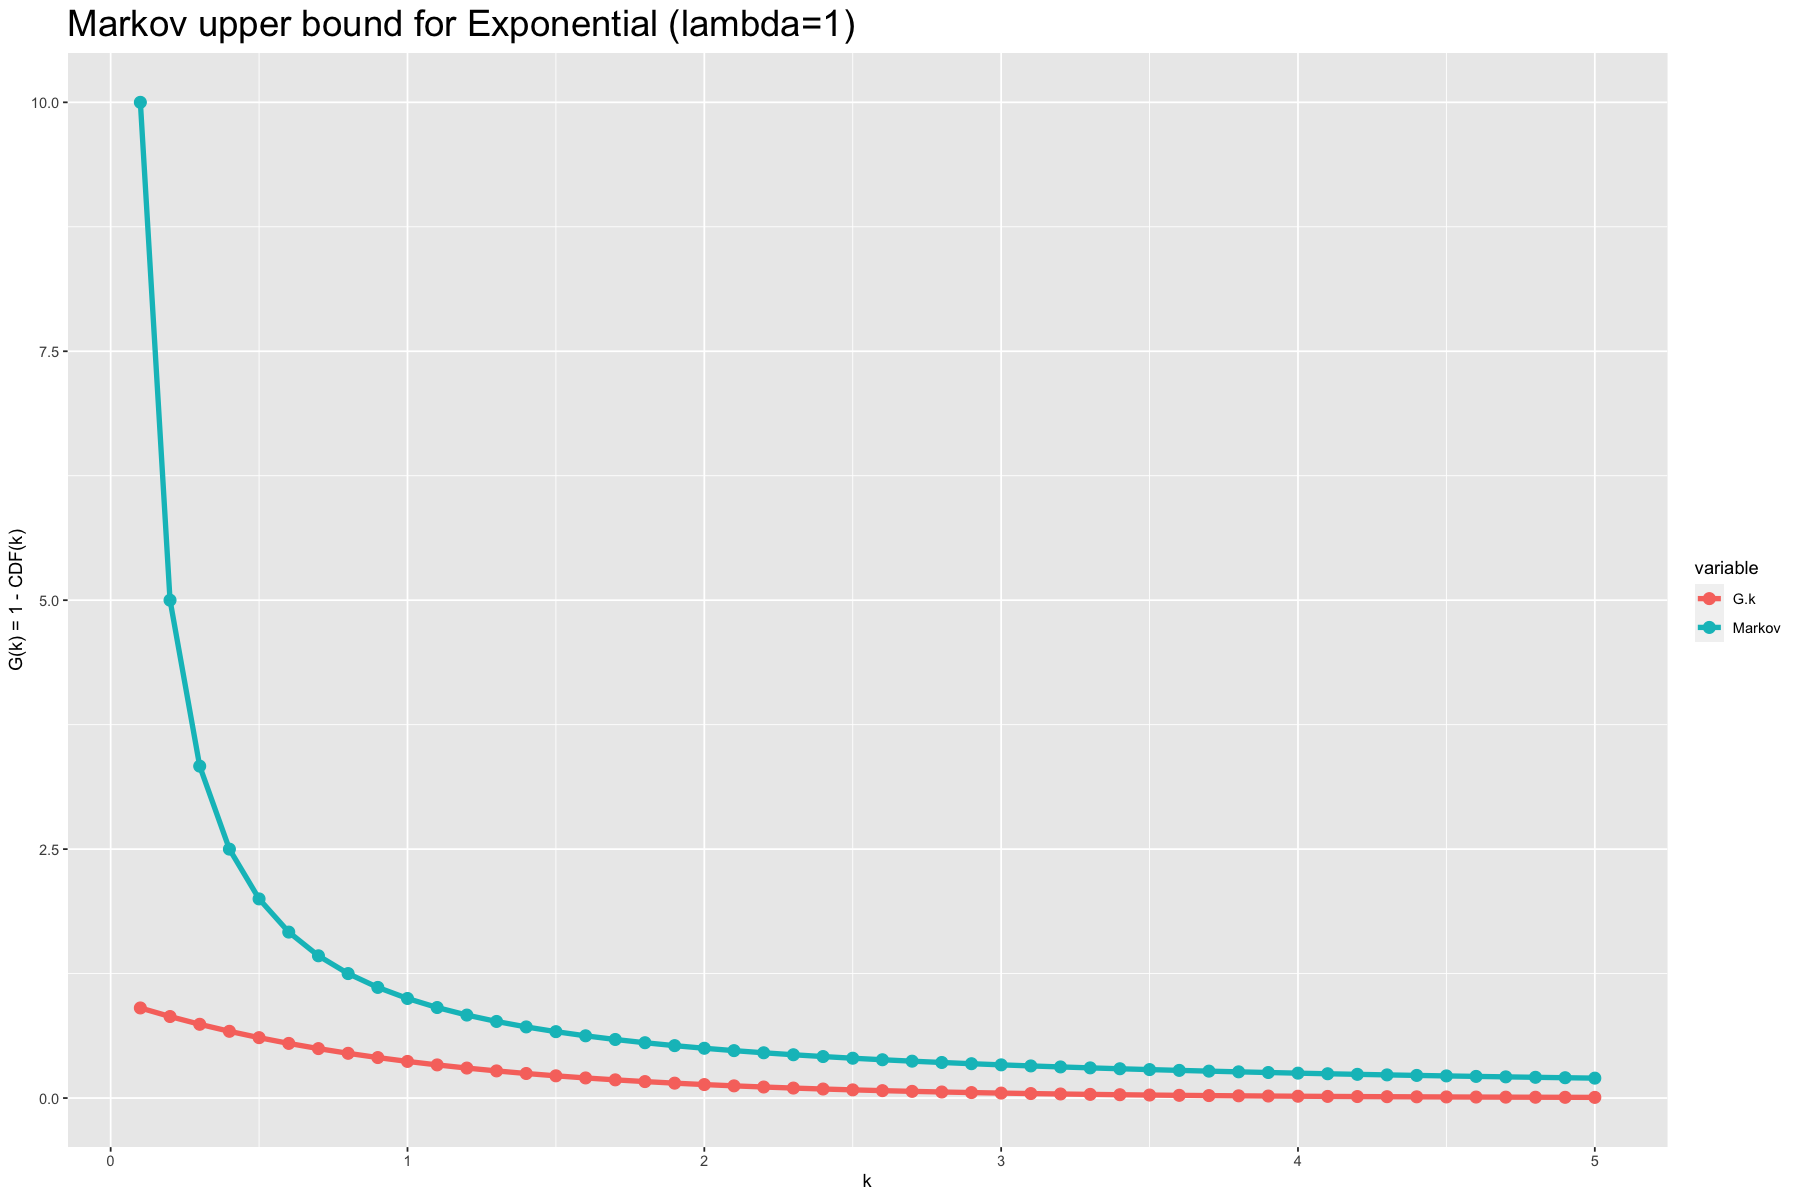

In [6]:
k = seq(0.1,5,.1)

G <- 1. - pexp(k,1)
Markov = 1./k
title = 'Markov upper bound for Exponential (lambda=1)'

plot_graph(k,G,Markov,title)

#### B. Plot G(k) and the Markov’s upper bound for the uniform, $\mathcal{U}(3,5)$, distribution function

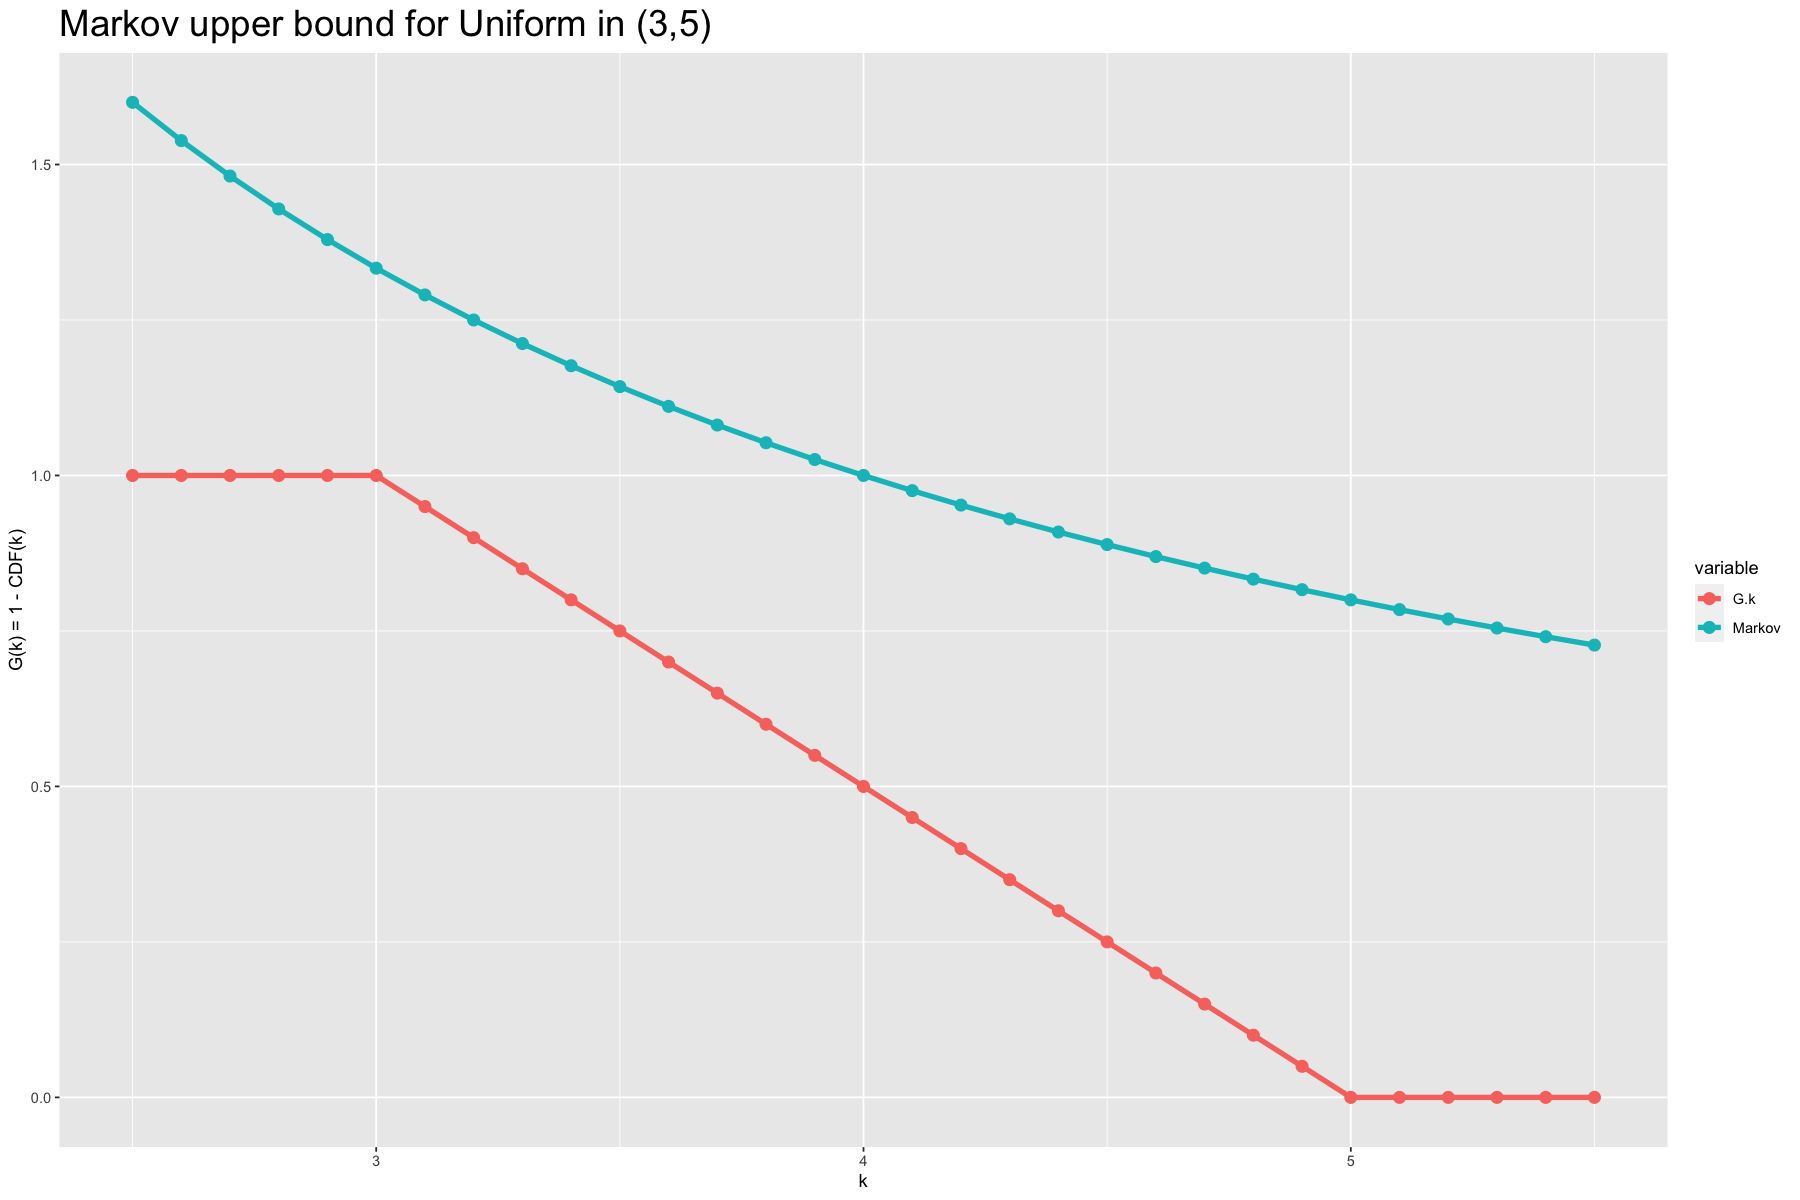

In [7]:
k = seq(2.5,5.5,.1)

G <- punif(k,3,5,low=FALSE)
Markov = 4/k
title = 'Markov upper bound for Uniform in (3,5)'

plot_graph(k,G,Markov,title)

#### C. Plot G(k) and the Markov’s upper bound for the binomial, $Bin(n = 1, p = 1/2)$, distribution function

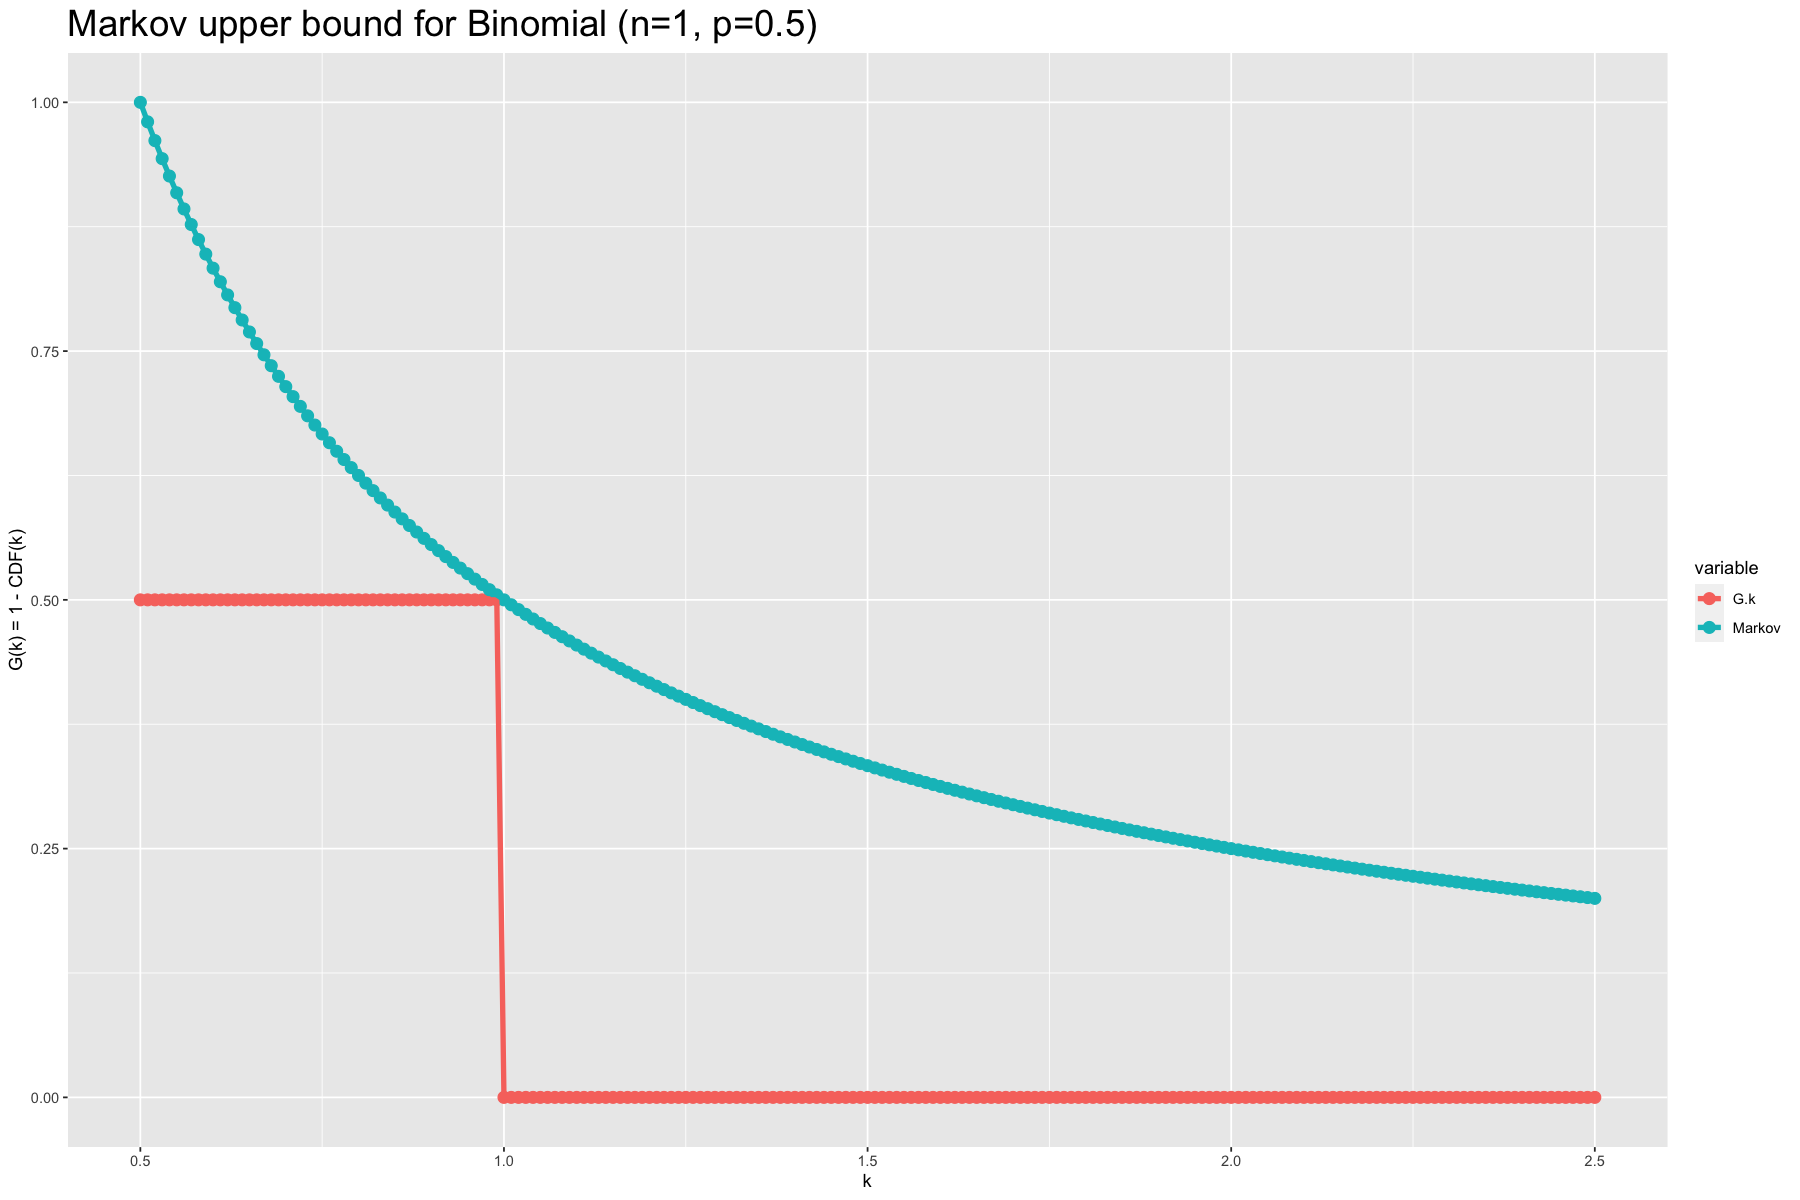

In [8]:
k = seq(0.5,2.5,.01)

G <- pbinom(k,1,.5,low=FALSE)
Markov = 0.5/k
title = 'Markov upper bound for Binomial (n=1, p=0.5)'

plot_graph(k,G,Markov,title)

#### D. Plot G(k) and the Markov’s upper bound for a Poisson, $Pois(\lambda = 1/2)$, distribution function

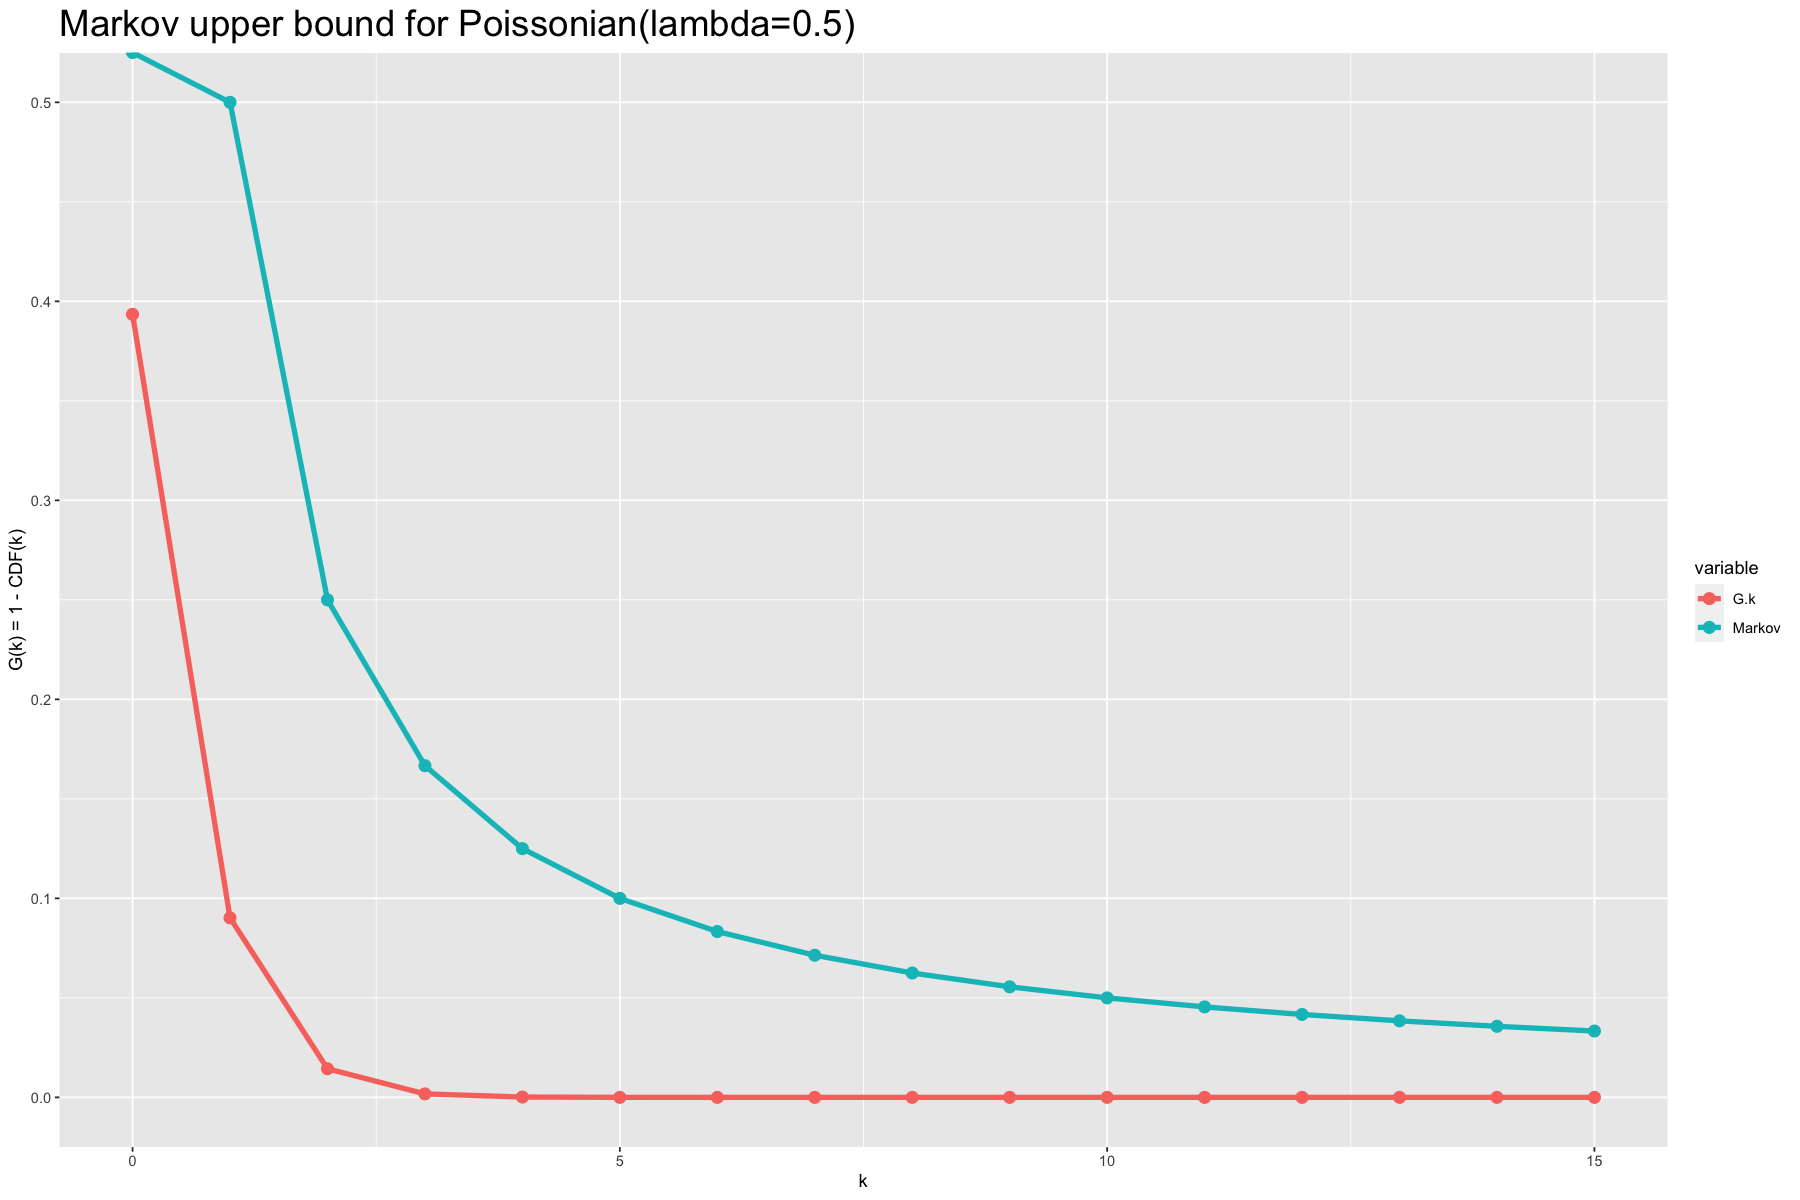

In [9]:
k = seq(0,15,1)

G <- ppois(k,0.5,low=FALSE)
Markov = 0.5/k
title = 'Markov upper bound for Poissonian(lambda=0.5)'

plot_graph(k,G,Markov,title)

In all previous graphs the bound is respected: the curve designed by $E[X]/k$ is always above the PDF. However, the gap between the two looks often very large, siggesting that this is not an optimal choice for approximationg the density functions. The last plot lets notice that for large values of $k$ the Markov bound will eventually get closet to the Poissonian distribution.

## Exercise 3 - Chebyshev’s inequality

- Chebyshev’s inequality tell us that:
$$
P(|X-\mu| \ge k\sigma) \le \frac{1}{k^2} \ \ \text{ for } k>0
$$
- Which can also be written as:
$$
P(|X-\mu| < k\sigma) \ge 1 - \frac{1}{k^2} \ \ \text{ for } k>0
$$ 

#### A. Use R to show, with a plot, that Chebyshev’s inequality is is an upper bound to a normal distribution, $N(\mu = 3, \sigma = 5)$


Exploting the second formula, it is possible to rewrite the interval for X as:

$$
|X-\mu| < k\sigma \iff X < \mu + k\sigma \land X > \mu - k\sigma
$$

Hence the requested probability is the CDF calculated ofer the open interval $(\mu-k\sigma,\mu+k\sigma)$:

$$
P(|X-\mu| < k\sigma) = F(X \le \mu + k\sigma) - F(X \le \mu - k\sigma)
$$

Like before, the expression above is exact just for continuous distributions (since the probability of a single point for those is null), but is incorrect for discrete ones: for those would be necessary to substract from the estimation the last value $X = \mu + k\sigma$, since the interval is open. However, since the samplig of $k$ will be very dense, I will neglect this extra term. The resulting plot confirm how the bound is still very valid.

In [10]:
# Function for plotting:
plot_graph <- function(k,G.k,Chebyshev,title){
    df <- tibble(k,G.k,Chebyshev)
    df <- reshape2::melt(df, id.vars='k')
    plt <- ggplot(df, aes(k, value, color=variable)) + labs(x="k", y="G(k) = 1 - CDF(k)") + coord_cartesian(ylim = c(-0.2, 1.2)) 
    plt <- plt + geom_point(size=3) + ggtitle(title) + geom_line(size=1.5) + theme(plot.title = element_text(size=22))
    plt
}

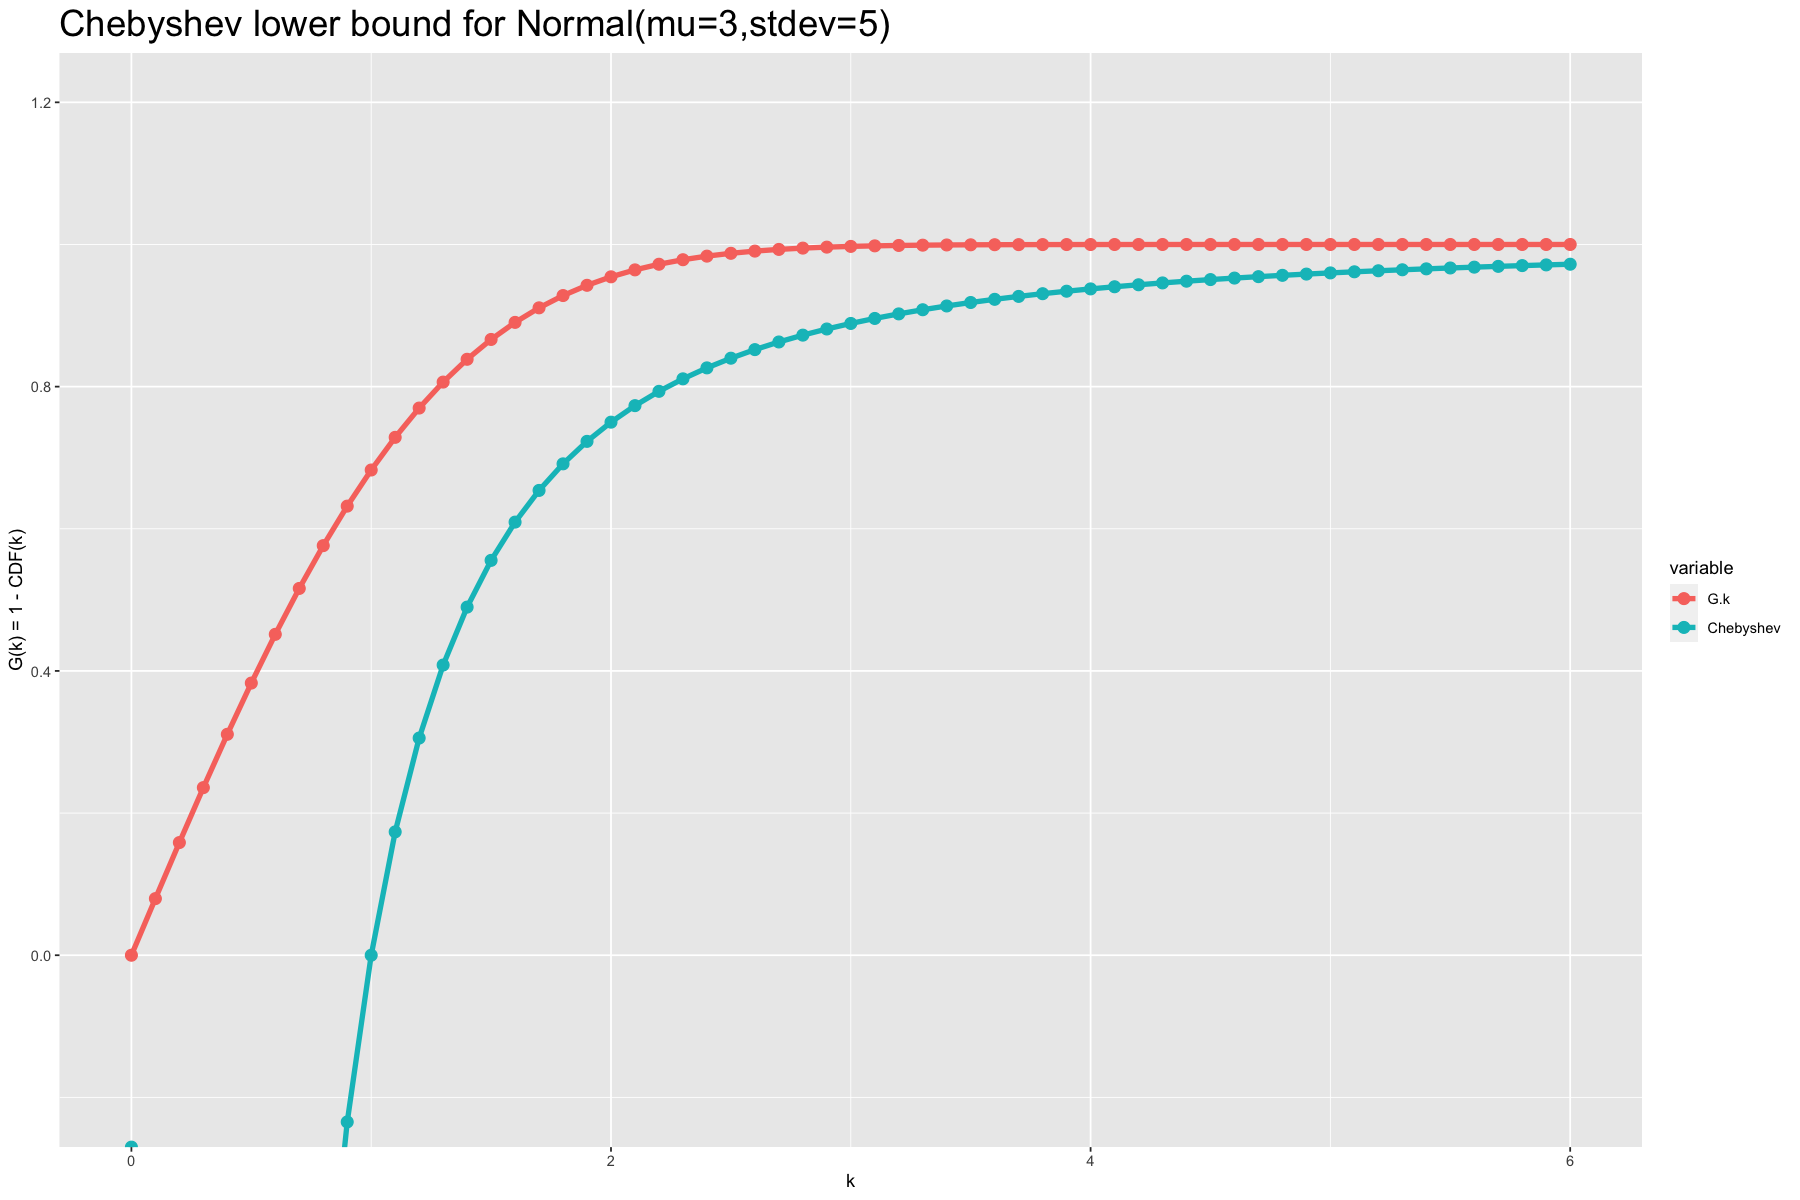

In [11]:
k = seq(0,6,.1)
mu = 3
sd = 5

G <- pnorm(mu+k*sd,mu,sd) - pnorm(mu-k*sd,mu,sd)
Cheby = 1 - (1/(k**2))
title = 'Chebyshev lower bound for Normal(mu=3,stdev=5)'

plot_graph(k,G,Cheby,title)

#### B. Use R to show, with a plot, that Chebyshev’s inequality is is an upper bound to an exponential distribution, $Exp(\lambda = 1)$

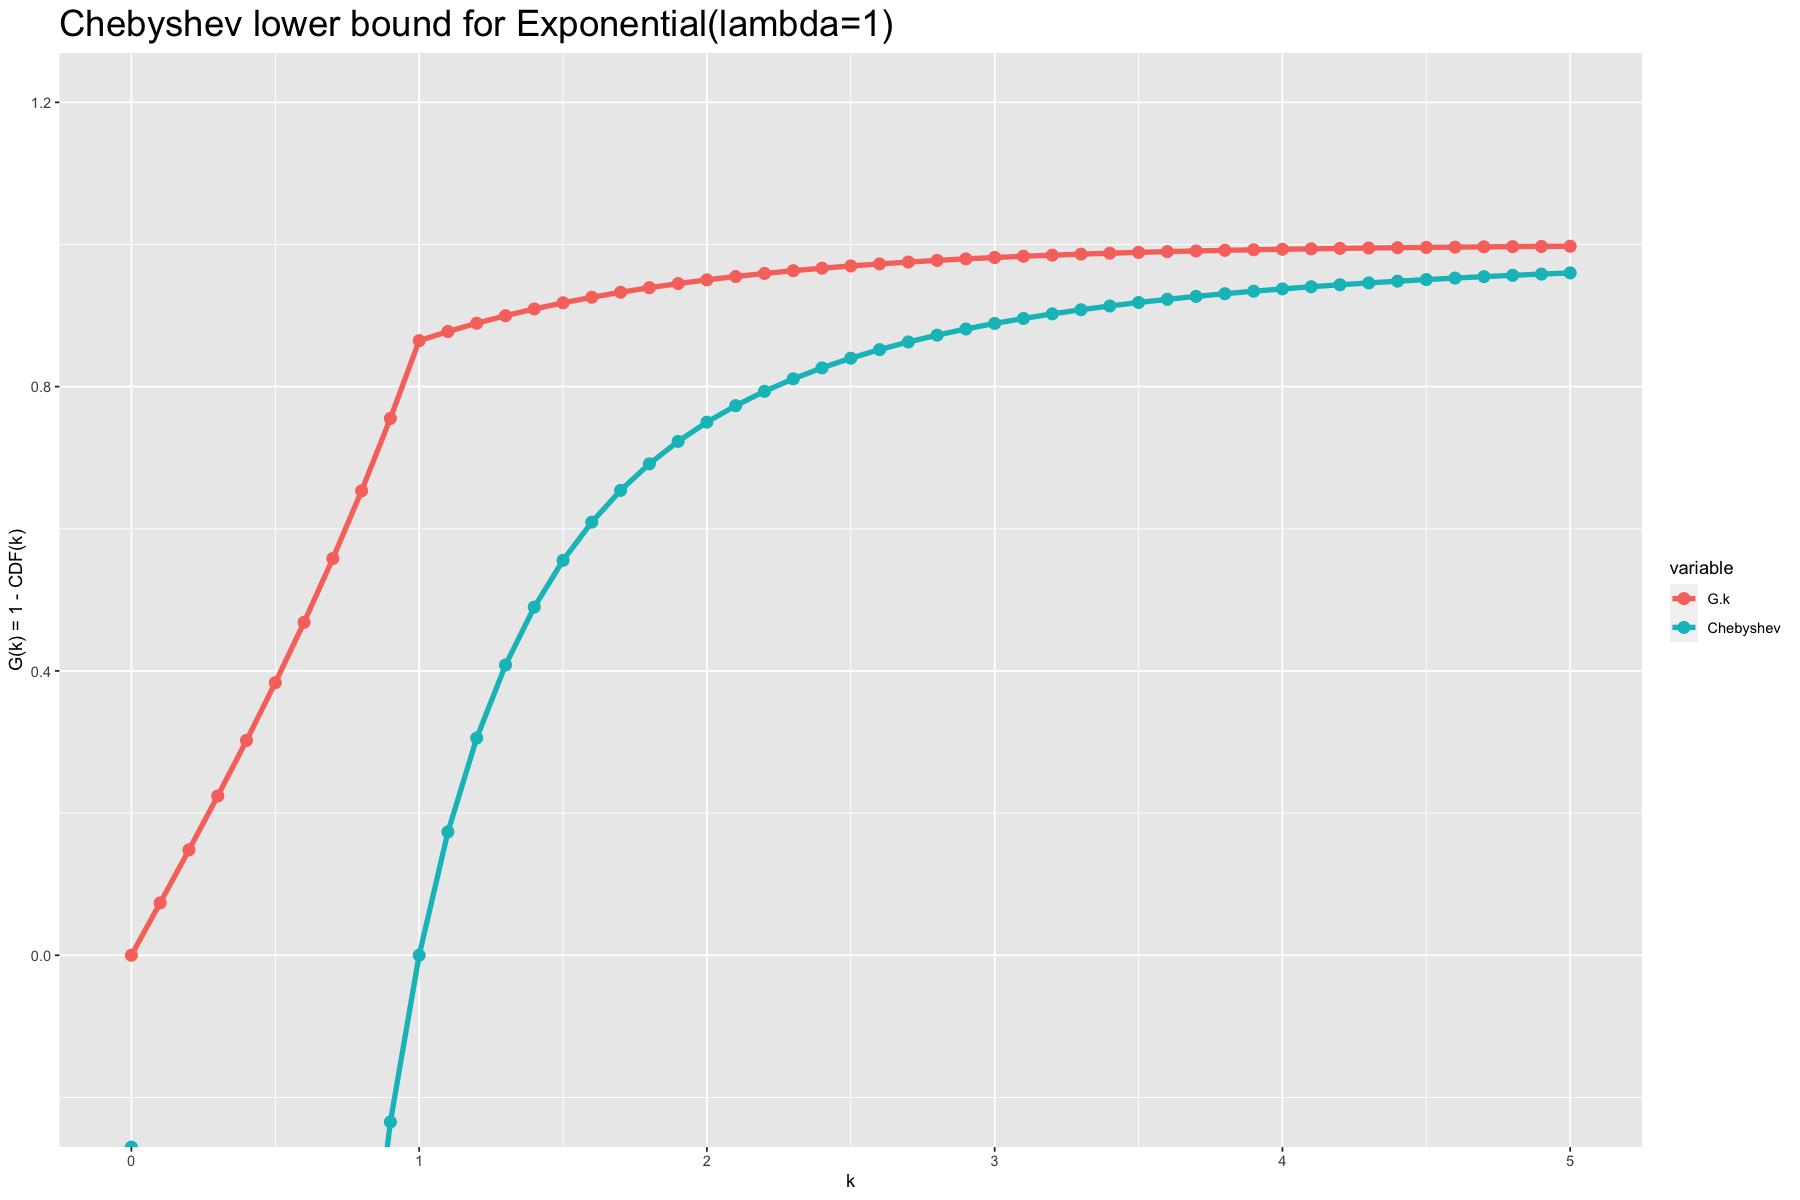

In [12]:
k = seq(0,5,.1)
mu = 1
sd = 1

G <- pexp(mu+k*sd) - pexp(mu-k*sd)
Cheby = 1 - (1/(k**2))
title = 'Chebyshev lower bound for Exponential(lambda=1)'

plot_graph(k,G,Cheby,title)

#### C. Use R to show, with a plot, that Chebyshev’s inequality is is an upper bound to a uniform distribution $\mathcal{U}(1 − \sqrt{2}, 1 + \sqrt{2})$

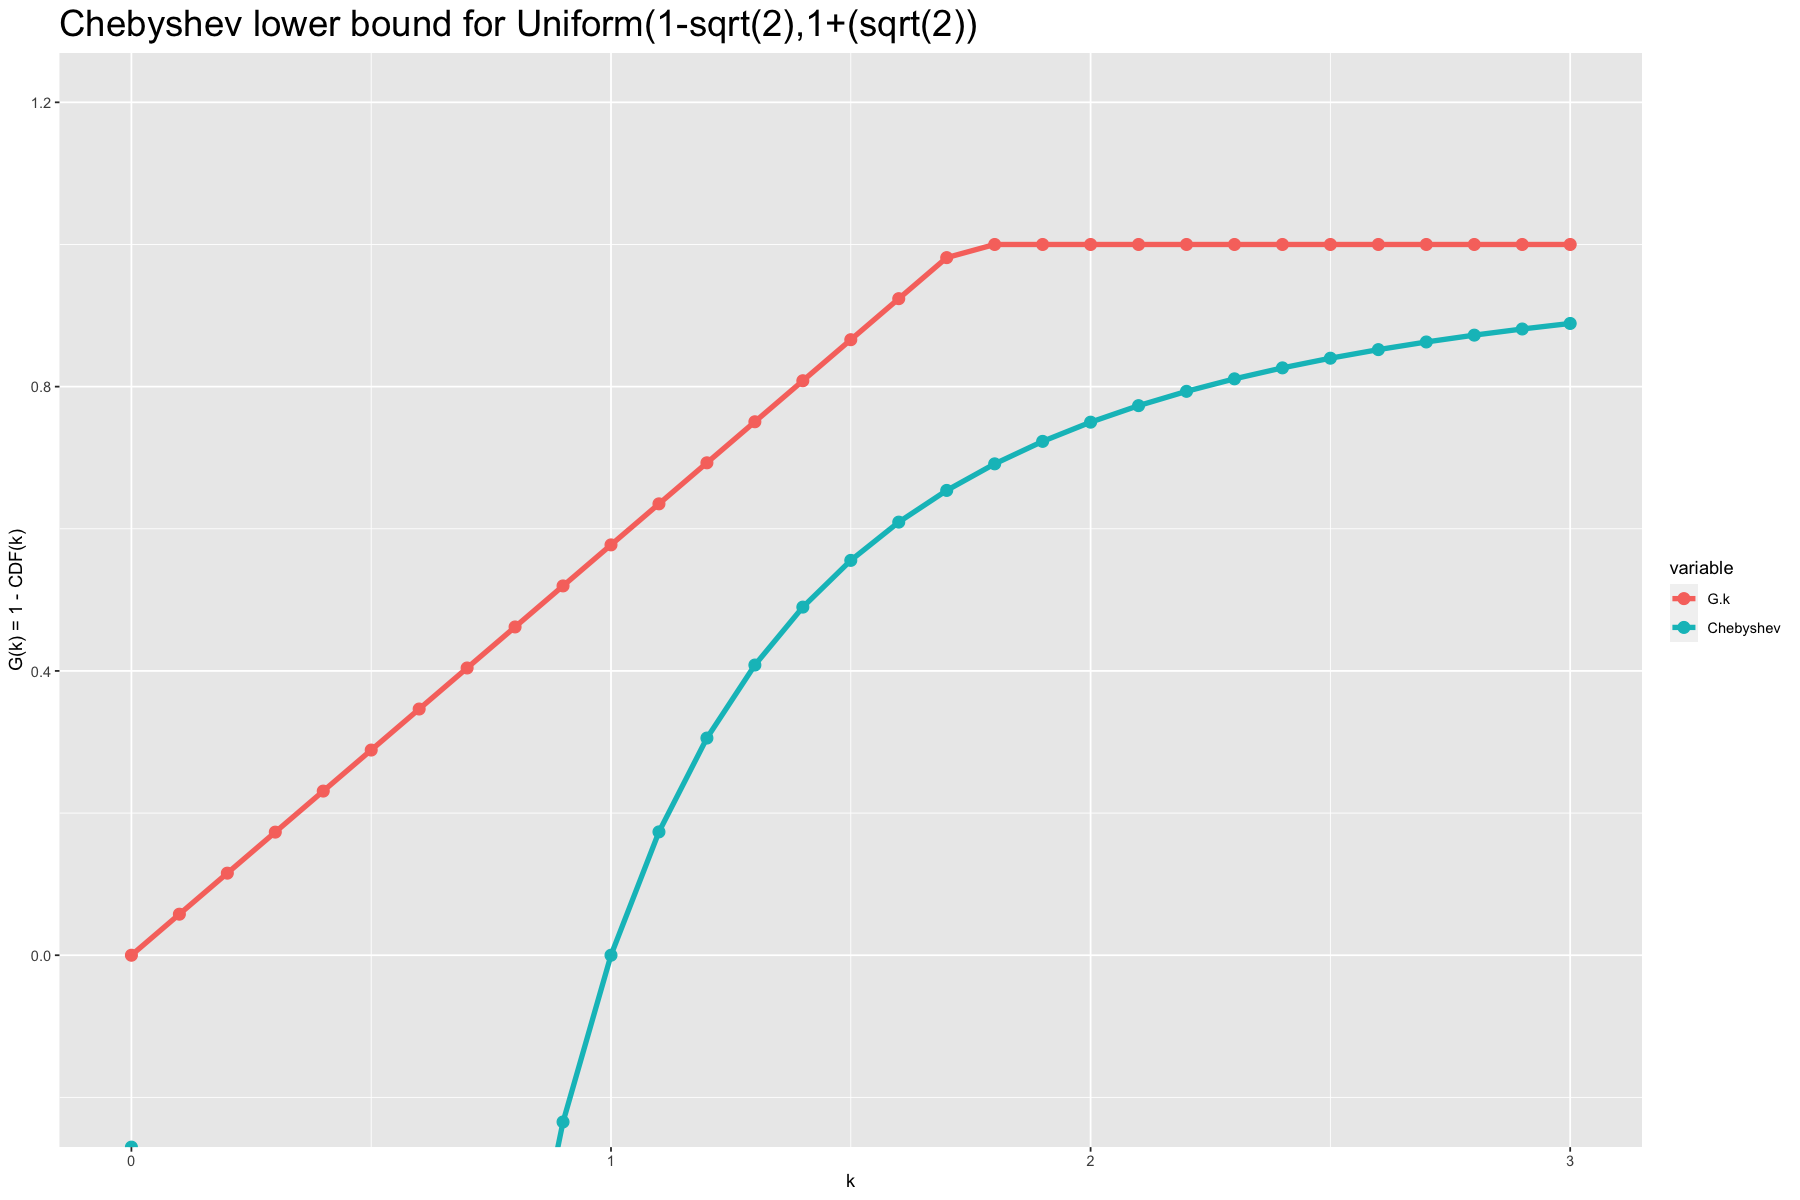

In [13]:
k = seq(0,3,.1)
mu = 1
sd = sqrt(2/3)

G <- punif(mu+k*sd, 1-sqrt(2), 1+sqrt(2)) - punif(mu-k*sd, 1-sqrt(2), 1+sqrt(2))
Cheby = 1 - (1/(k**2))
title = 'Chebyshev lower bound for Uniform(1-sqrt(2),1+(sqrt(2))'

plot_graph(k,G,Cheby,title)

#### D. Use R to show, with a plot, that Chebyshev’s inequality is is an upper bound to a Poisson, $Pois(\lambda = 1/3)$, distribution function

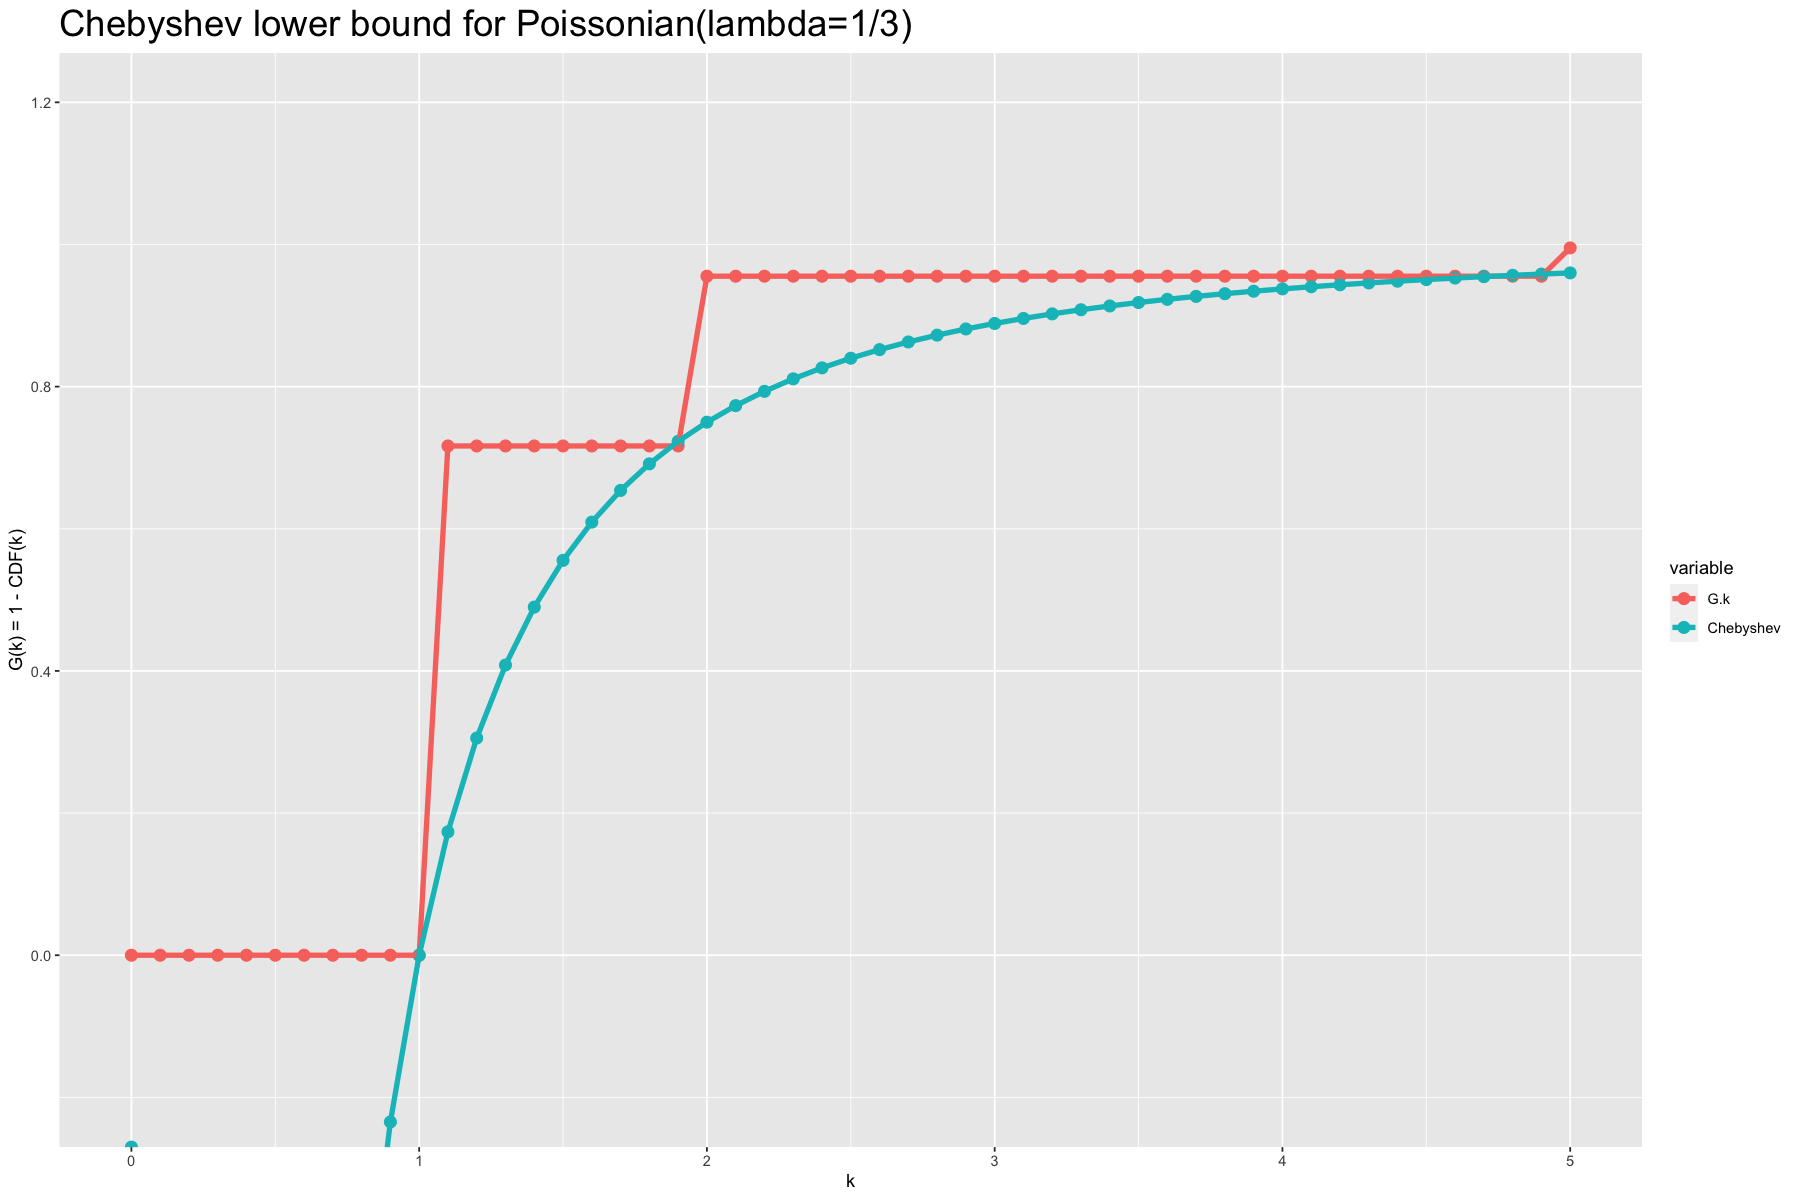

In [14]:
k = seq(0,5,.1)
mu = 1/3
sd = 1/3

G <- ppois(mu+k*sd, mu) - ppois(mu-k*sd, mu)
Cheby = 1 - (1/(k**2))
title = 'Chebyshev lower bound for Poissonian(lambda=1/3)'

plot_graph(k,G,Cheby,title)

The plots above depict the lower bound form of Chebyshev's formula. As one can see, this works well for both discrete and continuous probabilities. Once again, for some distributions the gap between PDF and bound is large (e.g., the uniform sitributions) while for some others, like for the Poissonian, Chebyshev's formula provides a good estimation.

## Exercise 4 - Community Mobility Open Data
- Community Mobility Reports have been created with the aim to provide insights into what has changed in response to policies aimed at combating COVID-19. Data can be found [here](https://www.google.com/covid19/mobility/).

#### Download and analyze the following data sets: [Dataset 1](https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv) and [Dataset 2](https://www.gstatic.com/covid19/mobility/Region_Mobility_Report_CSVs.zip)
The data show how visitors to (or time spent in) categorized places change compared to baseline days. A baseline day represents a normal value for that day of the week. The baseline day is the median value from the 5-week period Jan 3 – Feb 6, 2020.
To make the reports useful, categories have been used to group some of the places with similar characteristics for purposes of social distancing guidance. 

The following categories are available:
- **retail and recreation**, i.e. places like restaurants,cafes, shopping centers, theme parks,museums, libraries, and movie theaters
- **grocery and pharmacy**, i.e. grocery markets, food warehouses, farmers markets, specialty food shops, drug stores, and pharmacies
- **parks**, i.e. national parks, public beaches, marinas, dog parks, plazas,and public gardens
- **transit stations** i.e. all public transport hubs such as subway, bus, and train stations
- **workplaces**, i.e. places of work
- **residential**, i.e. people’s residence

#### Select a couple of European countries of your choice and analyze the trends in the previous variables over time:  produce a plot of the data by averaging the observable over a period of one week (hint: convert the "data" field to "lubridate::week") and one month and quantify the impact of COVID-19 restrictions on mobility sitations.

First of all, I define two functions that will allow to have easy access to the dataset. The first will adjust the dataset keeping only features of interest and organizing the data for week or month, while the second will proceed to the plots generation.

In [15]:
#Define functions for analysis


#Function for preparing data
dataframe_elaboration <- function(country, date_type='week'){
    
    myfunc <- function(date_type, date){
        if (date_type == 'week'){week(date)}
        else{month(date)}
    }


    filename = paste('~/AdvStat/Ex03/Datasets/Region_mobility_Report_CSVs/2020',country,'Region_Mobility_Report.csv', sep = "_")
    df <- tibble(read.csv(filename))
    
    baseline_columns = grepl('baseline', colnames(df)) #Keep only columns with baseline data
    baseline_columns[9] = TRUE                         #Add column for 'date' voice
    df <- df[baseline_columns]                         #Filter dataset discarding extra columns
    df$date <- myfunc(date_type,as.Date(df$date))       #Set week/month as date counter
    colnames(df)[1] <- 'data_index'                    #Rename index column

    wmean_df <- df %>%                        
              group_by(data_index) %>%
              summarize_all(mean, na.rm = TRUE)            #Create dataset on weekly basis 
      
}


#Function for plotting results
plot_df <- function(df, date_type, title){
    
    par(mfrow=c(2,3), oma = c(0, 0, 2, 0))
    for (i in 2:7){
        plot(df$data_index,df[[i]], pch=20, cex=1, col='red', ylim=c(-100,180),
             xlab = paste(date_type,'of 2020'), ylab = '% variation wrt baseline', main = str_remove(colnames(df)[i], '_percent_change_from_baseline'), cex.main=1.5, cex.lab=1.5)
        lines(df$data_index,df[[i]], col='red', lty = 1, lw=2)
        abline(h=0,lty=2,col='blue')
        grid() 
    }
    mtext(title, outer = TRUE, cex = 1.7)

}

Here I analise some European countries. In order to minimize space usage, I only plot monthly analysis for all.
## Italy

data_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7,1.602362,-0.6988189,21.671260,6.1653386,0.6535433,-0.7100592
8,-1.005624,4.5973003,21.110360,0.3480726,-3.4769404,0.8963964
9,-9.830146,-3.8008999,-5.310461,-18.7383918,-7.6546682,4.3130631
10,-21.617548,-1.9763780,-8.114736,-29.7502825,-16.3667042,7.8400901
11,-74.127109,-38.1034871,-61.886389,-69.1855204,-50.6501687,23.7497169
12,-82.416198,-53.0112486,-77.414027,-78.5931429,-62.4308211,28.6848692


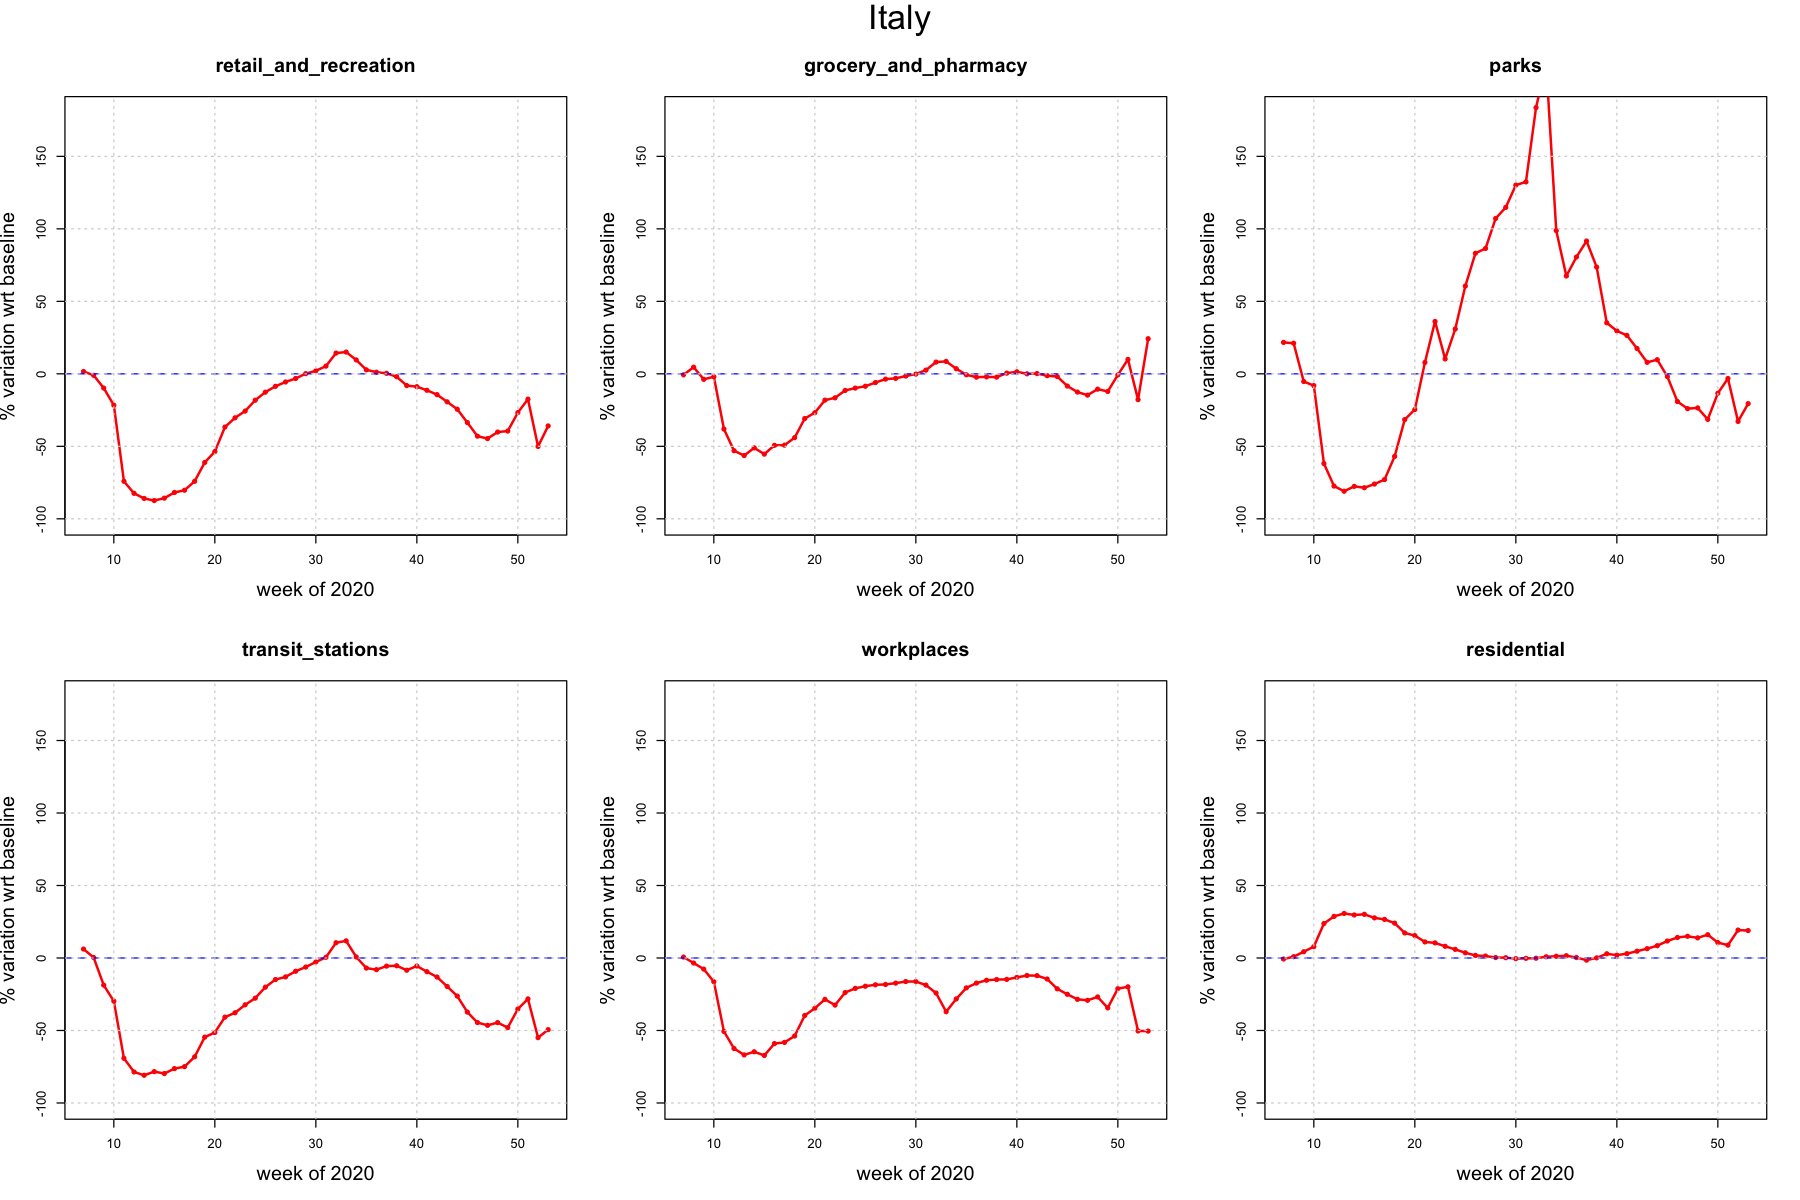

In [16]:
mydf <- dataframe_elaboration('IT','week')
head(mydf)
plot_df(mydf,'week', 'Italy')

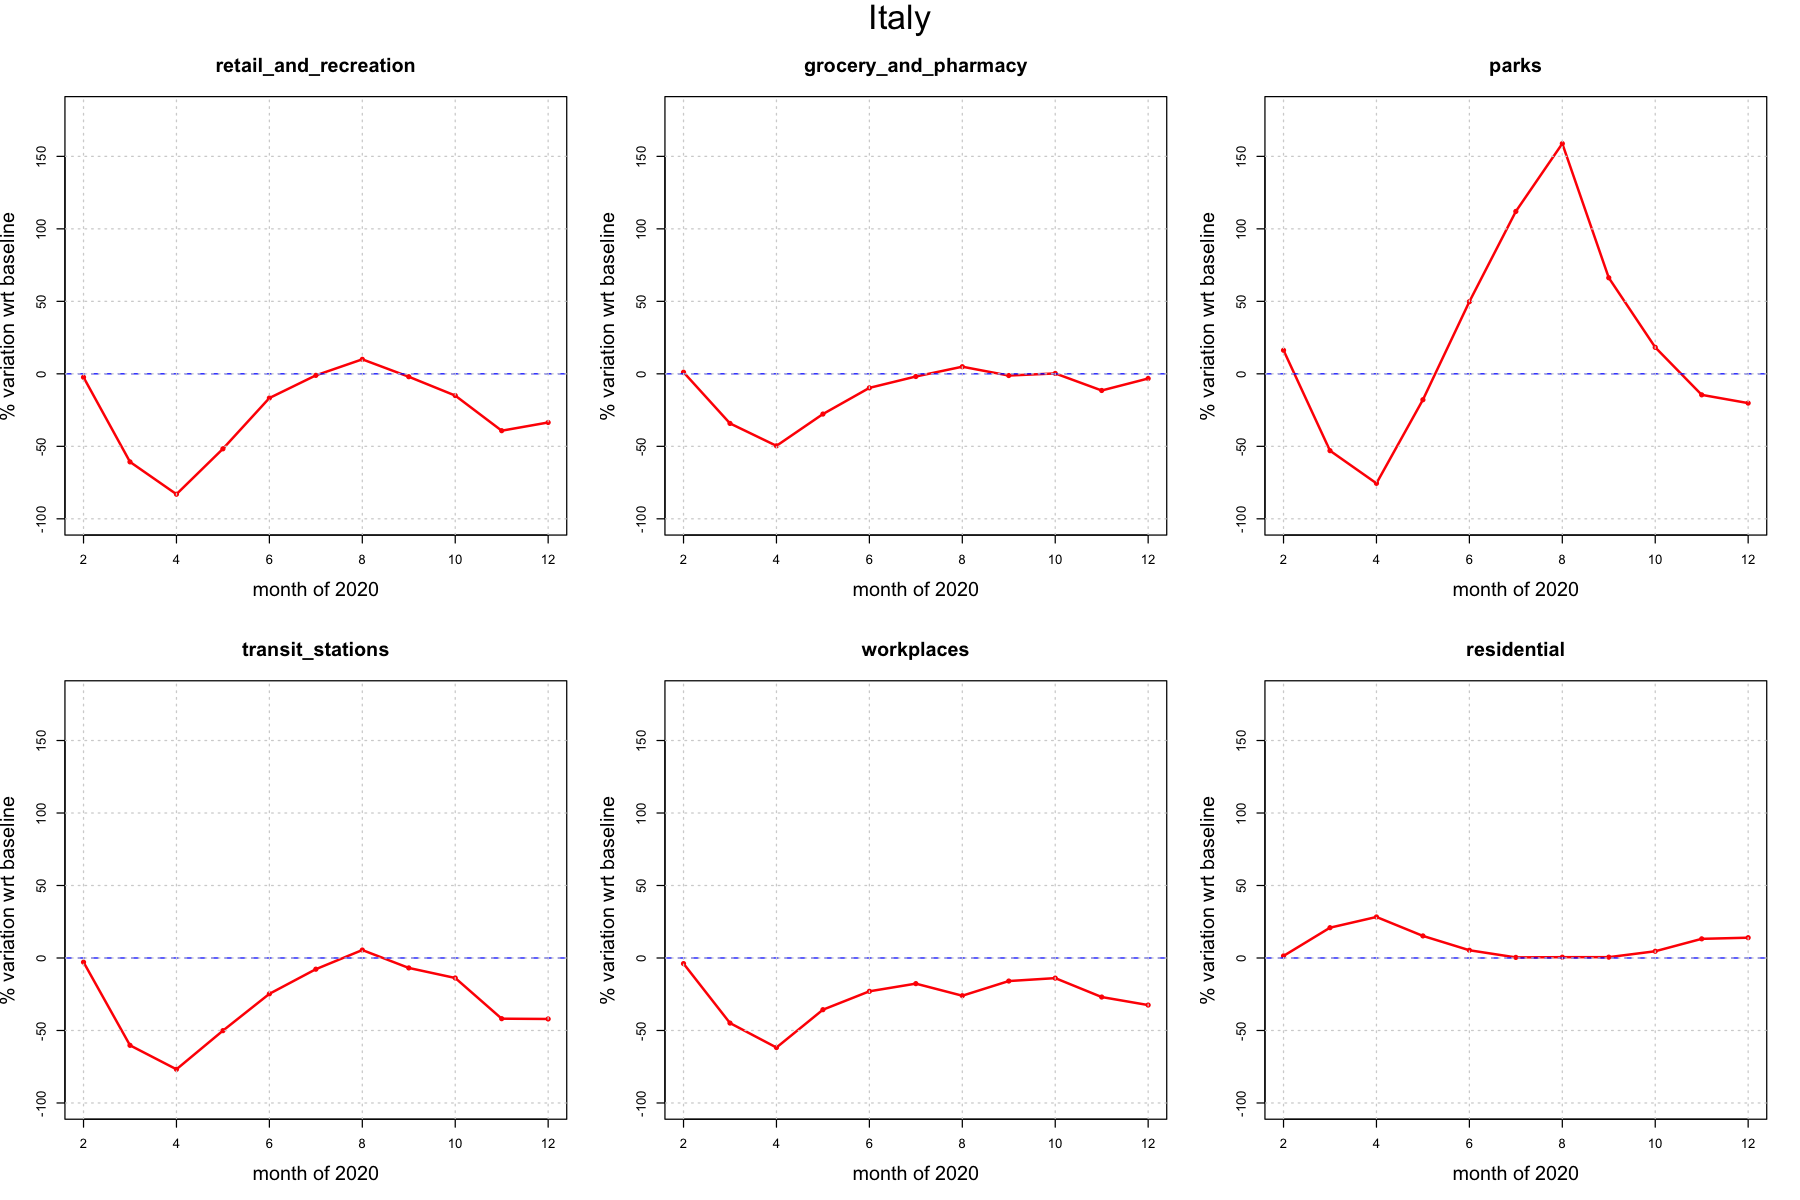

In [17]:
mydf <- dataframe_elaboration('IT','month')
plot_df(mydf,'month', 'Italy')
mean_stations_ita <- mean(mydf$transit_stations_percent_change_from_baseline)

## Sweden

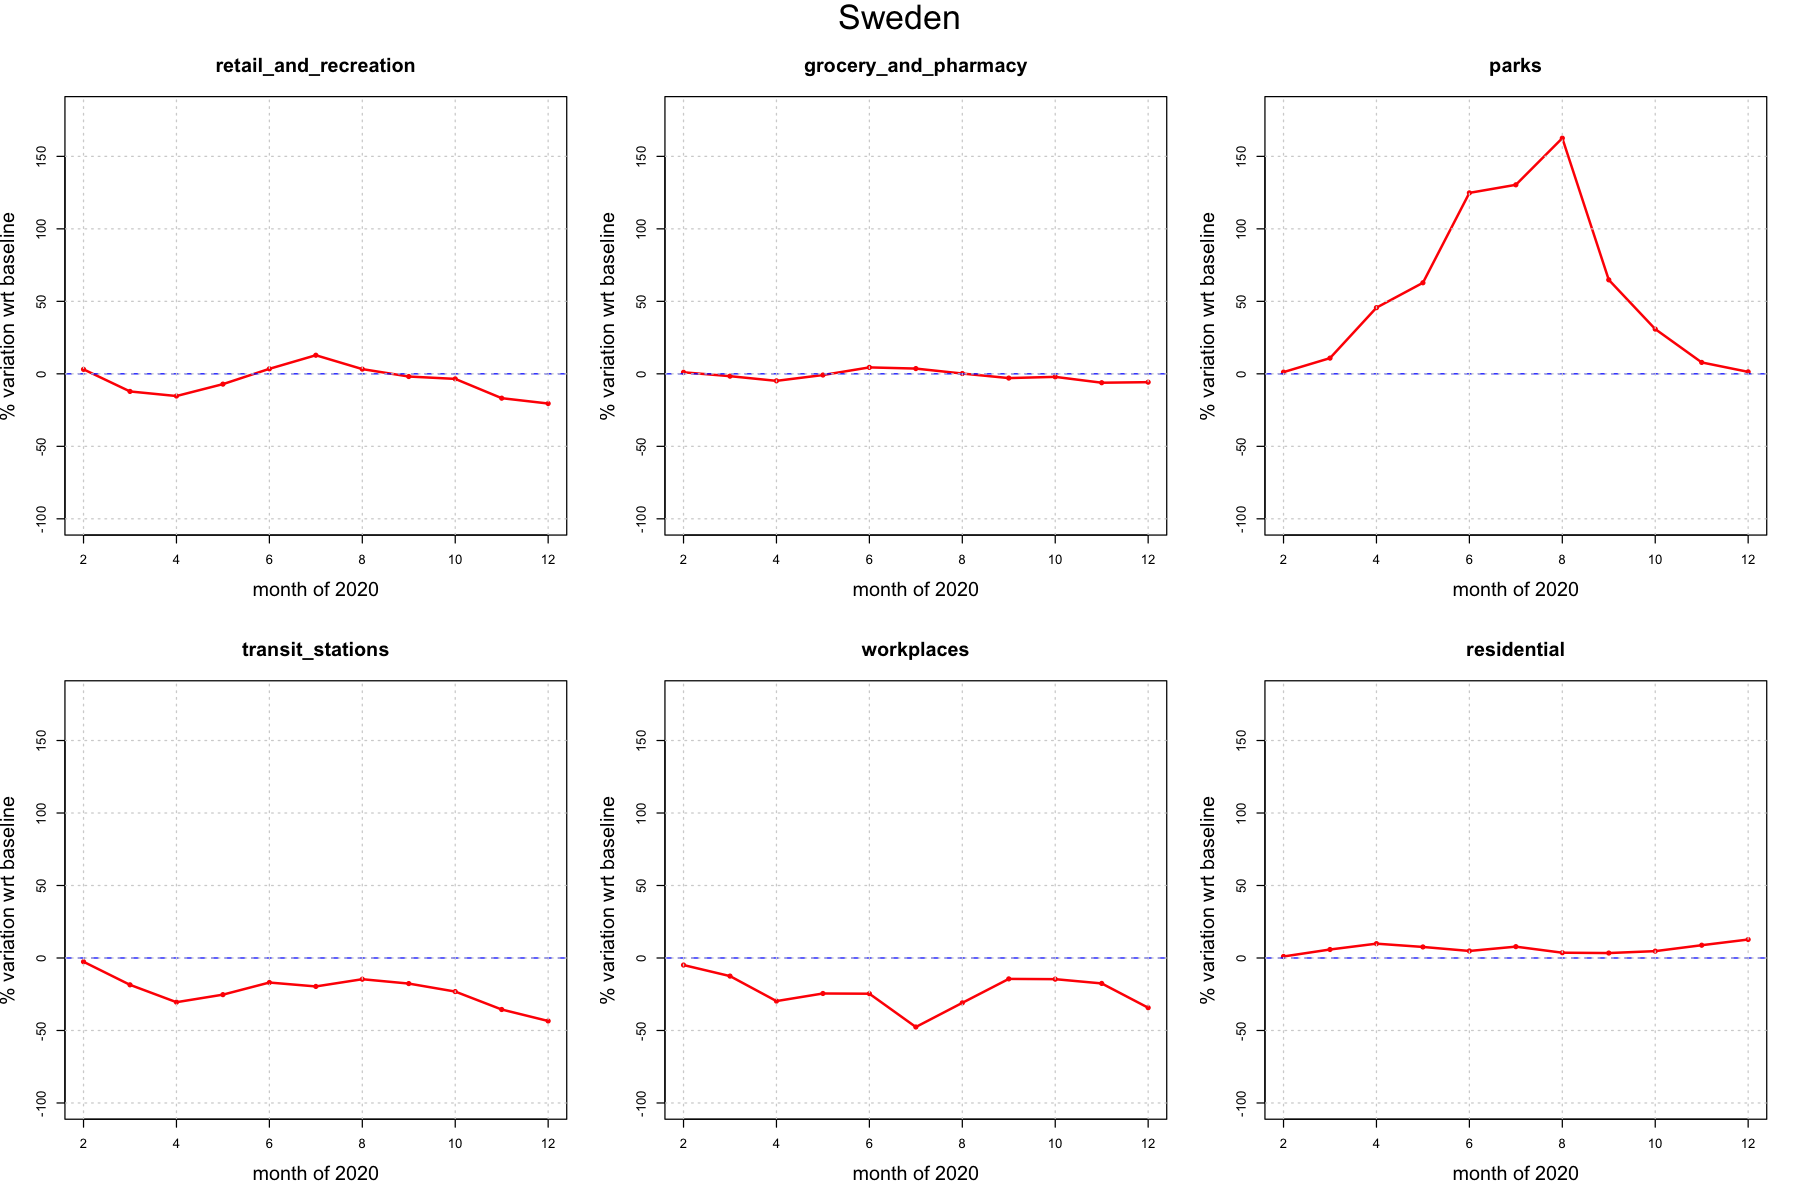

In [18]:
mydf <- dataframe_elaboration('SE','month')
plot_df(mydf,'month', 'Sweden')
mean_stations_swe <- mean(mydf$transit_stations_percent_change_from_baseline)

## Latvia

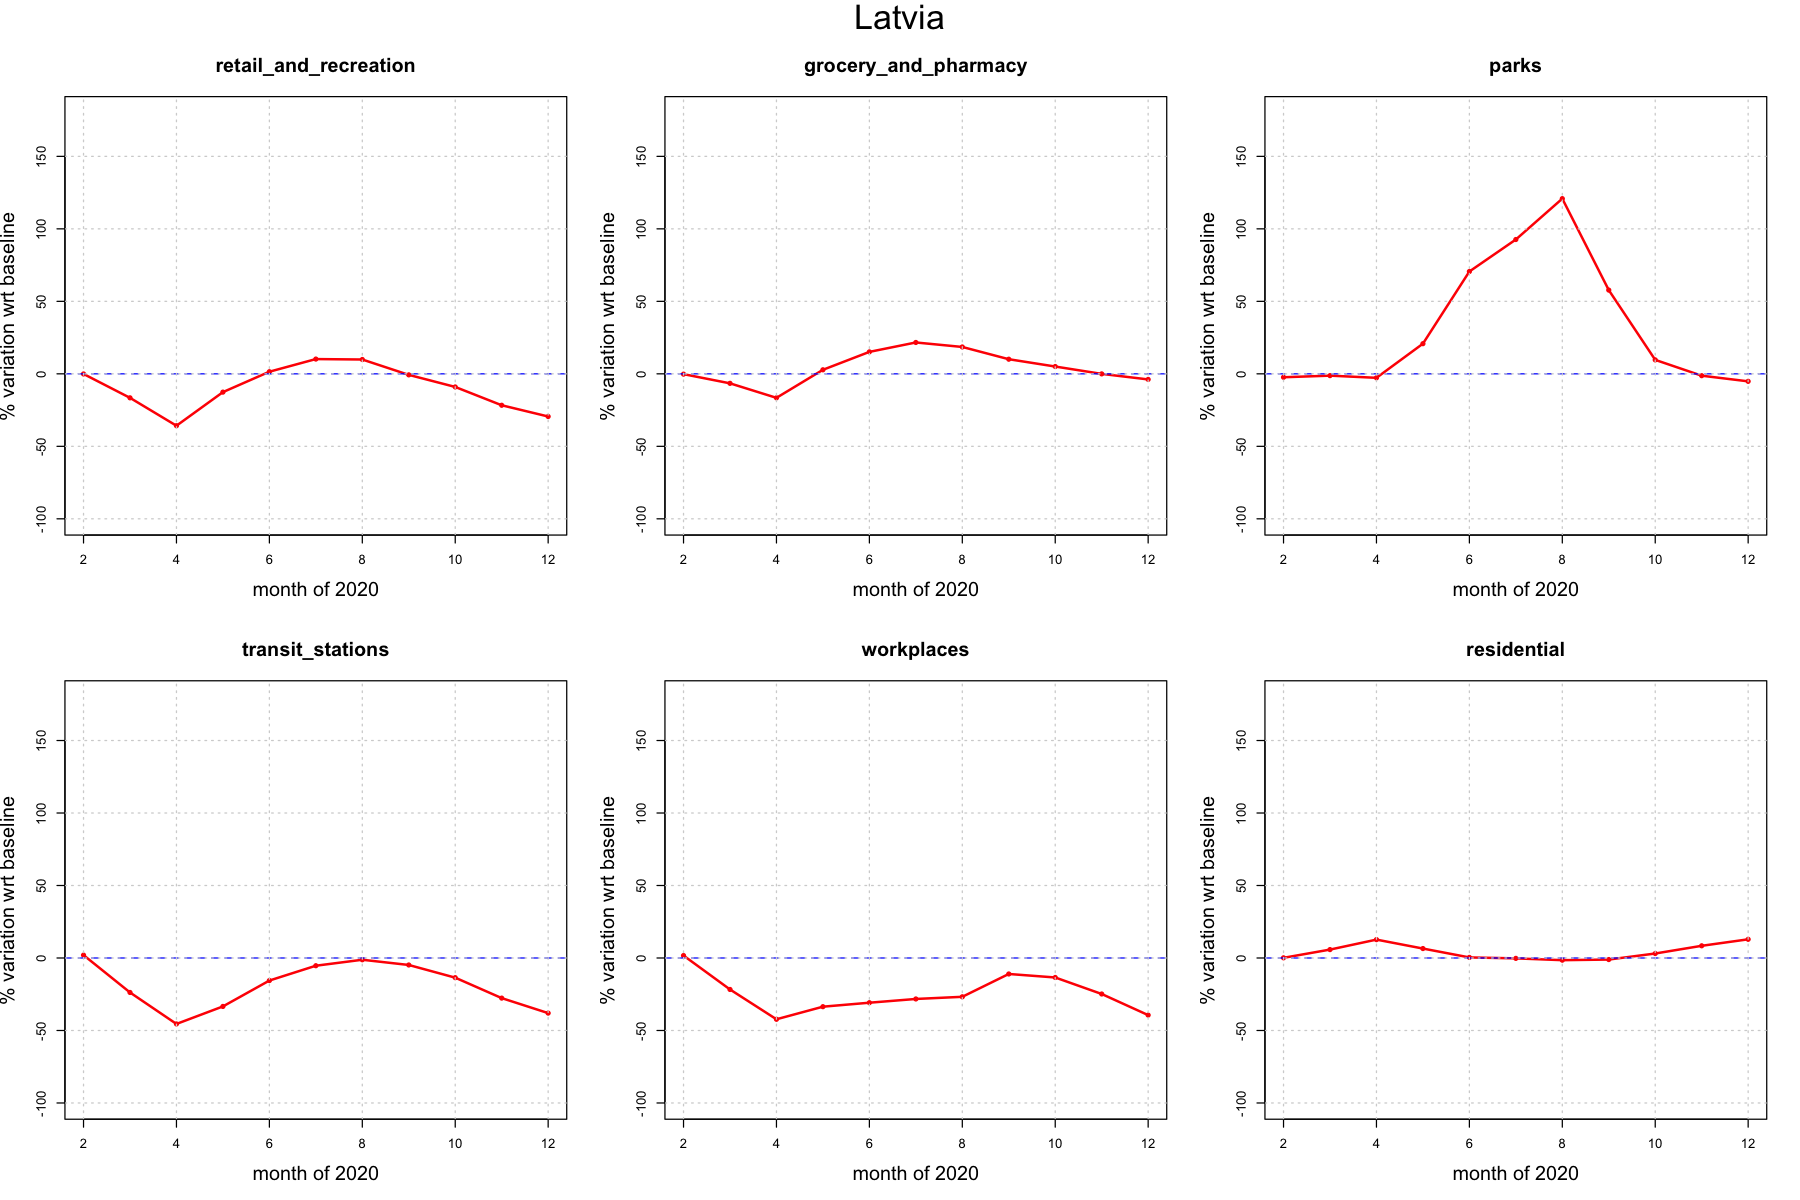

In [19]:
mydf <- dataframe_elaboration('LV','month')
plot_df(mydf,'month', 'Latvia')
mean_stations_ltv <- mean(mydf$transit_stations_percent_change_from_baseline)

The previous plots offer the possibility to compare the effects of the pandemic on Italy, Sweden and Latvia. Here are some takeaways from a sight of the plots:
- In all country, starting from March 2020, there has been a significant drop of frequency of workplaces w.r.t. the first period of the year;
- In all country the transit stations have seen a reduction of usage (the most large drop is April during the quarantine of April);
- All countries have enjoyed open air in parks much more during summer than during winter (seems reasonable to me);
- As for retail and recreation and grocery and pharmacies, the trend is similar for all countries: a drop of users in the spring months and a raise with the start of the summer. It is worth noticing how this curve is much more steady for Sweden and Latvia than for Italy: as a matter of fact, those countries have limited the "everyday lifestile" of people much less than our country, leading to less significant changes from the normality represented by the baseline. 

Finally, regarding the only "transit stations" section, here is what results:

In [20]:
sprintf('The overall visitors for Italy has changed of %.3g%% on average wrt January and February 2020', mean_stations_ita)
sprintf('The overall visitors for Sweden has changed of %.3g%% on average wrt January and February 2020', mean_stations_swe)
sprintf('The overall visitors for Latvia has changed of %.3g%% on average wrt January and February 2020', mean_stations_ltv)

[1] "The overall visitors for Italy has changed of -29.2% on average wrt January and February 2020"

[1] "The overall visitors for Sweden has changed of -22.5% on average wrt January and February 2020"

[1] "The overall visitors for Latvia has changed of -18.8% on average wrt January and February 2020"

Hence, it is fair to conclude that on average this is one of the sector which saw the worst overall fall of visitors during the 2020 pandemic.